# Consignes projet 4

**Anticipez les besoins en consommation électrique de bâtiments**
* Lien vers consignes : https://openclassrooms.com/fr/projects/629/assignment
* Lien vers données : https://www.kaggle.com/city-of-seattle/sea-building-energy-benchmarking#2015-building-energy-benchmarking.csv
* Lien vers score Star Energy : https://www.energystar.gov/buildings/facility-owners-and-managers/existing-buildings/use-portfolio-manager/interpret-your-results/what

* Lien vers la signification des colonnes (trouvé via recherche web) : https://data.seattle.gov/dataset/2016-Building-Energy-Benchmarking/2bpz-gwpy

# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#Modification des affichages de colonnes, lignes et largeurs de colonnes pour avoir un maximum d'information
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_colwidth', -1)

# Chargement jeu de données

In [3]:
data = pd.read_csv('data/data_cleaned.csv')

In [4]:
data.head()

,index,DataYear,BuildingType,PrimaryPropertyType,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEnergyUseWN(kBtu),Outlier,Latitude,Longitude,TotalGHGEmissions,Log2-SiteEnergyUseWN(kBtu)
0,0,2015,NonResidential,Residence/Hotel/Senior Care/Housing,7,DOWNTOWN,1927,1.0,12.0,88434,0,88434,Residence/Hotel/Senior Care/Housing,88434.0,Other,0.0,Other,0.0,65.0,7097539.0,Normal,47.612190,-122.337997,249.43,22.758888
1,5,2015,Nonresidential COS,Other,7,DOWNTOWN,1999,1.0,2.0,97288,37198,60090,Offices,88830.0,Other,0.0,Other,0.0,NaN,13045258.0,Normal,47.616439,-122.336764,304.62,23.637022
2,6,2015,NonResidential,Residence/Hotel/Senior Care/Housing,7,DOWNTOWN,1926,1.0,11.0,83008,0,83008,Residence/Hotel/Senior Care/Housing,81352.0,Other,0.0,Other,0.0,25.0,6477493.0,Normal,47.614114,-122.332741,208.46,22.627004
3,7,2015,NonResidential,Other,7,DOWNTOWN,1926,1.0,8.0,102761,0,102761,Leisure,102761.0,Other,0.0,Other,0.0,NaN,7380086.0,Normal,47.612902,-122.331309,199.99,22.815206
4,8,2015,NonResidential,Residence/Hotel/Senior Care/Housing,7,DOWNTOWN,1904,1.0,15.0,163984,0,163984,Residence/Hotel/Senior Care/Housing,163984.0,Other,0.0,Other,0.0,46.0,13589025.0,Normal,47.602589,-122.332553,331.61,23.695939


In [5]:
data.dtypes

index                              int64  
DataYear                           int64  
BuildingType                       object 
PrimaryPropertyType                object 
CouncilDistrictCode                int64  
Neighborhood                       object 
YearBuilt                          int64  
NumberofBuildings                  float64
NumberofFloors                     float64
PropertyGFATotal                   int64  
PropertyGFAParking                 int64  
PropertyGFABuilding(s)             int64  
LargestPropertyUseType             object 
LargestPropertyUseTypeGFA          float64
SecondLargestPropertyUseType       object 
SecondLargestPropertyUseTypeGFA    float64
ThirdLargestPropertyUseType        object 
ThirdLargestPropertyUseTypeGFA     float64
ENERGYSTARScore                    float64
SiteEnergyUseWN(kBtu)              float64
Outlier                            object 
Latitude                           float64
Longitude                          float64
TotalGHGEmi

In [6]:
data.shape

(5748, 25)

In [7]:
data.isna().sum().sum()

1459

In [8]:
#sauvegarde séparée du energy star score
energy_star_score = data['ENERGYSTARScore']
data.drop('ENERGYSTARScore', axis=1, inplace=True)

In [9]:
data.shape

(5748, 24)

In [10]:
data.isna().sum().sum()

0

# Préparation des vecteurs et matrices

## Séparation X et y 

In [11]:
y = data.copy()[{'SiteEnergyUseWN(kBtu)', 'TotalGHGEmissions' , 'Log2-SiteEnergyUseWN(kBtu)'}]
X = data.copy().drop(['SiteEnergyUseWN(kBtu)', 'TotalGHGEmissions', 'Log2-SiteEnergyUseWN(kBtu)'], axis=1)

## Normalisation & One Hot Encoder 

In [12]:
X.select_dtypes(['category','object']).nunique()

BuildingType                    8 
PrimaryPropertyType             12
Neighborhood                    13
LargestPropertyUseType          12
SecondLargestPropertyUseType    12
ThirdLargestPropertyUseType     12
Outlier                         3 
dtype: int64

In [13]:
X.shape

(5748, 21)

In [14]:
categorical_columns = X.select_dtypes(['category','object']).columns
numerical_columns = X.select_dtypes(['int32','float64']).columns

In [15]:
categorical_columns

Index(['BuildingType', 'PrimaryPropertyType', 'Neighborhood',
       'LargestPropertyUseType', 'SecondLargestPropertyUseType',
       'ThirdLargestPropertyUseType', 'Outlier'],
      dtype='object')

In [16]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

ohe = OneHotEncoder(sparse=False)
ss = StandardScaler()
X[numerical_columns] = ss.fit_transform(X[numerical_columns])
ohe.fit_transform(X[categorical_columns])

X = pd.merge(X[numerical_columns], 
          pd.DataFrame(columns = ohe.get_feature_names().tolist(),
              data = ohe.fit_transform(X[categorical_columns])),
        left_index = True, right_index = True)

Transformation des types des catégories sorties du one hot encoding

In [17]:
import re
regex = re.compile(r'x\d_')
for column in X.columns:
    if regex.search(column):
        X[column] = X[column].astype('int32')

In [18]:
X.sample(5)

,NumberofBuildings,NumberofFloors,LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,Latitude,Longitude,x0_Campus,x0_Multifamily HR (10+),x0_Multifamily LR (1-4),x0_Multifamily MR (5-9),x0_NonResidential,x0_Nonresidential COS,x0_Nonresidential WA,x0_SPS-District K-12,x1_Education,x1_Facility,x1_Health,x1_Leisure,x1_Office,x1_Offices,x1_Other,x1_Residence/Hotel/Senior Care/Housing,x1_Retail,x1_Storage,x1_Supermarket / Grocery Store,x1_Warehouse,x2_BALLARD,x2_CENTRAL,x2_DELRIDGE,x2_DOWNTOWN,x2_EAST,x2_GREATER DUWAMISH,x2_LAKE UNION,x2_MAGNOLIA / QUEEN ANNE,x2_NORTH,x2_NORTHEAST,x2_NORTHWEST,x2_SOUTHEAST,x2_SOUTHWEST,x3_Education,x3_Facility,x3_Health,x3_Leisure,x3_Office,x3_Offices,x3_Other,x3_Parking,"x3_Personal Services (Health/Beauty, Dry Cleaning, etc)",x3_Residence/Hotel/Senior Care/Housing,x3_Retail,x3_Storage,x4_Education,x4_Facility,x4_Health,x4_Leisure,x4_Office,x4_Offices,x4_Other,x4_Parking,"x4_Personal Services (Health/Beauty, Dry Cleaning, etc)",x4_Residence/Hotel/Senior Care/Housing,x4_Retail,x4_Storage,x5_Education,x5_Facility,x5_Health,x5_Leisure,x5_Office,x5_Offices,x5_Other,x5_Parking,"x5_Personal Services (Health/Beauty, Dry Cleaning, etc)",x5_Residence/Hotel/Senior Care/Housing,x5_Retail,x5_Storage,x6_High Outlier,x6_Low Outlier,x6_Normal
4401,-0.034419,0.489769,-0.451874,0.270173,-0.159065,-0.112574,-0.821020,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
2746,-0.034419,0.489769,0.169862,0.411958,-0.159065,-0.494124,0.051374,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
3508,-0.034419,1.035613,-0.518956,0.396616,-0.159065,-0.239517,-0.355397,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
2703,-0.034419,-0.601920,-0.437089,0.206867,-0.159065,0.578421,-0.996367,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
2160,-0.034419,-0.328997,-0.467361,-0.362042,-0.159065,-0.134231,0.650803,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1


## Infos sur X et y

In [19]:
X.shape

(5748, 79)

In [20]:
y.shape

(5748, 3)

# Séparation jeu de données

**Séparation test / train**

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = \
                        train_test_split(X, 
                                         y['Log2-SiteEnergyUseWN(kBtu)'],  
                                         test_size = 0.2, 
                                         random_state = 42
                                        )

In [22]:
X_train.shape

(4598, 79)

In [23]:
X_test.shape

(1150, 79)

In [24]:
y_train.shape

(4598,)

In [25]:
y_test.shape

(1150,)

In [26]:
results = pd.DataFrame({})

In [27]:
print(X_train.isna().sum().sum())
print(X_test.isna().sum().sum())
print(y_train.isna().sum().sum())
print(y_test.isna().sum().sum())


0
0
0
0


# Modélisation

**Imports**

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

## Linear Regression / Ridge Regression / Lasso / Elastic Net

Le modèle Elastic Net comprend les modèles linéaires / ridge et lasso via les valeurs des coefficients dans le grid search CV

In [29]:
from sklearn.linear_model import ElasticNet

#rappel de la fonction de coût du elasticnet
#1 / (2 * n_samples) * ||y - Xw||^2_2 + alpha * l1_ratio * ||w||_1 + 0.5 * alpha * (1 - l1_ratio) * ||w||^2_2

parameters = {'tol' : [0.1,0.01,0.001,0.0001],
              "alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],  #alpha, coef qui multiplie le terme de pénalité)
              "l1_ratio": np.arange(0.0, 1.0, 0.1)}#L1 ratio , =1 équivaut à un Lasso, 0 à un Ridge


elastic_grid = GridSearchCV(estimator = ElasticNet(), 
                      param_grid = parameters,
                      scoring = 'neg_mean_squared_error',
                      cv=5,
                      verbose=0
                     )

elastic_grid.fit(X_train, y_train)

C:\Users\Vincent\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3179.4801988277936, tolerance: 1145.6698832421478
  positive)
C:\Users\Vincent\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2818.960161447549, tolerance: 1068.2494412722915
  positive)
C:\Users\Vincent\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2679.8686944831916, tolerance: 1058.4188168357052
  positive)
C:\Users\Vincent\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. 

C:\Users\Vincent\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 88.3049486841528, tolerance: 1.0619758704734
  positive)
C:\Users\Vincent\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 57.09829191112385, tolerance: 11.456698832421479
  positive)
C:\Users\Vincent\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 97.02949240599173, tolerance: 10.682494412722914
  positive)
C:\Users\Vincent\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dualit

C:\Users\Vincent\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 114.26257114369037, tolerance: 11.456698832421479
  positive)
C:\Users\Vincent\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 100.12480791450434, tolerance: 10.682494412722914
  positive)
C:\Users\Vincent\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 65.08742115746372, tolerance: 10.584188168357052
  positive)
C:\Users\Vincent\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. 

C:\Users\Vincent\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25.201142157021422, tolerance: 1.0682494412722914
  positive)
C:\Users\Vincent\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 150.23958186620712, tolerance: 1.0584188168357052
  positive)
C:\Users\Vincent\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 156.13878327384782, tolerance: 1.0588080352486442
  positive)
C:\Users\Vincent\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations.

C:\Users\Vincent\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2852.6898867233504, tolerance: 10.619758704733998
  positive)
C:\Users\Vincent\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3218.373300438407, tolerance: 1.145669883242148
  positive)
C:\Users\Vincent\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2858.2303206660117, tolerance: 1.0682494412722914
  positive)
C:\Users\Vincent\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. D

C:\Users\Vincent\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3764.276462580757, tolerance: 114.56698832421478
  positive)
C:\Users\Vincent\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3393.9501088720103, tolerance: 106.82494412722914
  positive)
C:\Users\Vincent\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3282.9125503235555, tolerance: 105.84188168357052
  positive)
C:\Users\Vincent\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. 

C:\Users\Vincent\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4149.46719134112, tolerance: 1.0682494412722914
  positive)
C:\Users\Vincent\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4080.6801158958256, tolerance: 1.0584188168357052
  positive)
C:\Users\Vincent\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4093.433894108465, tolerance: 1.0588080352486442
  positive)
C:\Users\Vincent\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Du

C:\Users\Vincent\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5258.148525422531, tolerance: 105.84188168357052
  positive)
C:\Users\Vincent\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5259.704046760817, tolerance: 105.8808035248644
  positive)
C:\Users\Vincent\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5275.177827092046, tolerance: 106.19758704734
  positive)
C:\Users\Vincent\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dualit

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=1000, normalize=False,
                                  positive=False, precompute=False,
                                  random_state=None, selection='cyclic',
                                  tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                         'l1_ratio': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'tol': [0.1, 0.01, 0.001, 0.0001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [30]:
elastic_grid.best_params_

{'alpha': 0.001, 'l1_ratio': 0.6000000000000001, 'tol': 0.1}

{'alpha': 0.001, 'l1_ratio': 0.9, 'tol': 0.1}

Le modèle optimal a les caractéristiques suivantes:
* alpha = 0.001 : le terme de régularisation Lasso (L1) est quasiment nul mais il ne s'agit pas de notre paramètre le plus faible dasn le grid search CV
* le terme l1_ratio est approximativement de 0.9, signifiant que le poids du L1 est plus important que celui du L2 dans la régularisation 

In [31]:
import math
results = results.append(pd.DataFrame({
    'Modèle' : ['Elasticnet Regression'],
    'Score_RMSE' : [math.sqrt(mean_squared_error(elastic_grid.predict(X_test), y_test))]}),
              ignore_index=True)

## Random Forest Regressor

In [32]:
from sklearn.ensemble import RandomForestRegressor

parameters = {
    'n_estimators' : [10,50,100,300,500], #nombre d'arbres de décision
    'min_samples_leaf' : [1,3,5,10], #nombre de feuilles minimales dans un noeud
    'max_features': ['auto', 'sqrt'] #nombre de features observées pour chaque arbre
}

In [33]:
rfr_search = GridSearchCV(RandomForestRegressor(),
                               param_grid = parameters,
                               #scoring='mean_squared_error',
                              verbose=2,
                               cv=5)

rfr_search.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV] max_features=auto, min_samples_leaf=1, n_estimators=10 ..........


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_features=auto, min_samples_leaf=1, n_estimators=10, total=   0.3s
[CV] max_features=auto, min_samples_leaf=1, n_estimators=10 ..........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  max_features=auto, min_samples_leaf=1, n_estimators=10, total=   0.4s
[CV] max_features=auto, min_samples_leaf=1, n_estimators=10 ..........
[CV]  max_features=auto, min_samples_leaf=1, n_estimators=10, total=   0.4s
[CV] max_features=auto, min_samples_leaf=1, n_estimators=10 ..........
[CV]  max_features=auto, min_samples_leaf=1, n_estimators=10, total=   0.3s
[CV] max_features=auto, min_samples_leaf=1, n_estimators=10 ..........
[CV]  max_features=auto, min_samples_leaf=1, n_estimators=10, total=   0.3s
[CV] max_features=auto, min_samples_leaf=1, n_estimators=50 ..........
[CV]  max_features=auto, min_samples_leaf=1, n_estimators=50, total=   1.7s
[CV] max_features=auto, min_samples_leaf=1, n_estimators=50 ..........
[CV]  max_features=auto, min_samples_leaf=1, n_estimators=50, total=   1.7s
[CV] max_features=auto, min_samples_leaf=1, n_estimators=50 ..........
[CV]  max_features=auto, min_samples_leaf=1, n_estimators=50, total=   1.7s
[CV] max_features=auto, min_samples_leaf=1

[CV]  max_features=auto, min_samples_leaf=5, n_estimators=50, total=   1.1s
[CV] max_features=auto, min_samples_leaf=5, n_estimators=50 ..........
[CV]  max_features=auto, min_samples_leaf=5, n_estimators=50, total=   1.1s
[CV] max_features=auto, min_samples_leaf=5, n_estimators=50 ..........
[CV]  max_features=auto, min_samples_leaf=5, n_estimators=50, total=   1.1s
[CV] max_features=auto, min_samples_leaf=5, n_estimators=100 .........
[CV]  max_features=auto, min_samples_leaf=5, n_estimators=100, total=   2.2s
[CV] max_features=auto, min_samples_leaf=5, n_estimators=100 .........
[CV]  max_features=auto, min_samples_leaf=5, n_estimators=100, total=   2.2s
[CV] max_features=auto, min_samples_leaf=5, n_estimators=100 .........
[CV]  max_features=auto, min_samples_leaf=5, n_estimators=100, total=   2.2s
[CV] max_features=auto, min_samples_leaf=5, n_estimators=100 .........
[CV]  max_features=auto, min_samples_leaf=5, n_estimators=100, total=   2.3s
[CV] max_features=auto, min_samples_le

[CV]  max_features=sqrt, min_samples_leaf=1, n_estimators=100, total=   1.2s
[CV] max_features=sqrt, min_samples_leaf=1, n_estimators=100 .........
[CV]  max_features=sqrt, min_samples_leaf=1, n_estimators=100, total=   1.2s
[CV] max_features=sqrt, min_samples_leaf=1, n_estimators=300 .........
[CV]  max_features=sqrt, min_samples_leaf=1, n_estimators=300, total=   3.2s
[CV] max_features=sqrt, min_samples_leaf=1, n_estimators=300 .........
[CV]  max_features=sqrt, min_samples_leaf=1, n_estimators=300, total=   2.8s
[CV] max_features=sqrt, min_samples_leaf=1, n_estimators=300 .........
[CV]  max_features=sqrt, min_samples_leaf=1, n_estimators=300, total=   2.7s
[CV] max_features=sqrt, min_samples_leaf=1, n_estimators=300 .........
[CV]  max_features=sqrt, min_samples_leaf=1, n_estimators=300, total=   2.7s
[CV] max_features=sqrt, min_samples_leaf=1, n_estimators=300 .........
[CV]  max_features=sqrt, min_samples_leaf=1, n_estimators=300, total=   3.3s
[CV] max_features=sqrt, min_samples

[CV]  max_features=sqrt, min_samples_leaf=5, n_estimators=300, total=   1.3s
[CV] max_features=sqrt, min_samples_leaf=5, n_estimators=500 .........
[CV]  max_features=sqrt, min_samples_leaf=5, n_estimators=500, total=   2.1s
[CV] max_features=sqrt, min_samples_leaf=5, n_estimators=500 .........
[CV]  max_features=sqrt, min_samples_leaf=5, n_estimators=500, total=   2.2s
[CV] max_features=sqrt, min_samples_leaf=5, n_estimators=500 .........
[CV]  max_features=sqrt, min_samples_leaf=5, n_estimators=500, total=   2.2s
[CV] max_features=sqrt, min_samples_leaf=5, n_estimators=500 .........
[CV]  max_features=sqrt, min_samples_leaf=5, n_estimators=500, total=   2.2s
[CV] max_features=sqrt, min_samples_leaf=5, n_estimators=500 .........
[CV]  max_features=sqrt, min_samples_leaf=5, n_estimators=500, total=   2.2s
[CV] max_features=sqrt, min_samples_leaf=10, n_estimators=10 .........
[CV]  max_features=sqrt, min_samples_leaf=10, n_estimators=10, total=   0.0s
[CV] max_features=sqrt, min_samples

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed: 10.8min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'max_features': ['auto', 'sqrt'

In [34]:
rfr_search.best_params_

{'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 500}

{'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 300}

In [35]:
import math
results = results.append(pd.DataFrame({
    'Modèle' : ['Random Forest Regressor'],
    'Score_RMSE' : [math.sqrt(mean_squared_error(rfr_search.predict(X_test), y_test))]}),
              ignore_index=True)

In [36]:
coefficients = abs(rfr_search.best_estimator_.feature_importances_)
liste_coefs_rer = pd.concat((pd.DataFrame(X.columns, columns = ['Variable']), 
                      pd.DataFrame(coefficients, columns = ['Coefficient'])), axis = 1).sort_values(by='Coefficient', ascending = False)

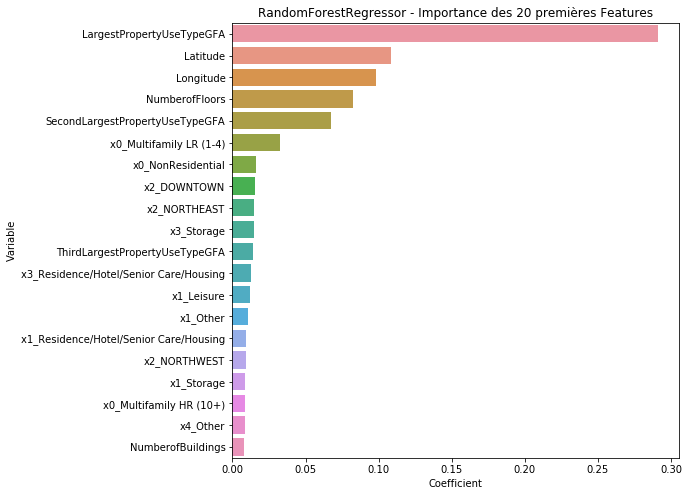

In [37]:
plt.figure(figsize=(8,8))
plt.title('RandomForestRegressor - Importance des 20 premières Features')
sns.barplot(y = liste_coefs_rer['Variable'].head(20),
            x = liste_coefs_rer['Coefficient'].head(20))
plt.show()

## Support Vector Regression 

In [38]:
from sklearn.svm import SVR

parameters = {'gamma' : [1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1], #kernel coefficient [ici kernel = Radial Basis Function]
              'epsilon' : [0.001, 0.01, 0.1, 1], #erreur tolérée par l'algorithme
              'C' : [0.001, 0.01, 0.1, 1, 10]} #parametre de régularisation

svm = GridSearchCV(estimator = SVR(), 
                      param_grid = parameters,
                      #scoring = 'neg_mean_squared_error',
                      cv=5,
                   verbose=2
                     )

svm.fit(X_train, y_train)

Fitting 5 folds for each of 160 candidates, totalling 800 fits
[CV] C=0.001, epsilon=0.001, gamma=1e-08 .............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............. C=0.001, epsilon=0.001, gamma=1e-08, total=   2.5s
[CV] C=0.001, epsilon=0.001, gamma=1e-08 .............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.4s remaining:    0.0s


[CV] .............. C=0.001, epsilon=0.001, gamma=1e-08, total=   2.6s
[CV] C=0.001, epsilon=0.001, gamma=1e-08 .............................
[CV] .............. C=0.001, epsilon=0.001, gamma=1e-08, total=   2.5s
[CV] C=0.001, epsilon=0.001, gamma=1e-08 .............................
[CV] .............. C=0.001, epsilon=0.001, gamma=1e-08, total=   2.6s
[CV] C=0.001, epsilon=0.001, gamma=1e-08 .............................
[CV] .............. C=0.001, epsilon=0.001, gamma=1e-08, total=   2.8s
[CV] C=0.001, epsilon=0.001, gamma=1e-07 .............................
[CV] .............. C=0.001, epsilon=0.001, gamma=1e-07, total=   3.1s
[CV] C=0.001, epsilon=0.001, gamma=1e-07 .............................
[CV] .............. C=0.001, epsilon=0.001, gamma=1e-07, total=   2.9s
[CV] C=0.001, epsilon=0.001, gamma=1e-07 .............................
[CV] .............. C=0.001, epsilon=0.001, gamma=1e-07, total=   2.8s
[CV] C=0.001, epsilon=0.001, gamma=1e-07 .............................
[CV] .

[CV] ............... C=0.001, epsilon=0.01, gamma=1e-05, total=   2.7s
[CV] C=0.001, epsilon=0.01, gamma=0.0001 .............................
[CV] .............. C=0.001, epsilon=0.01, gamma=0.0001, total=   2.6s
[CV] C=0.001, epsilon=0.01, gamma=0.0001 .............................
[CV] .............. C=0.001, epsilon=0.01, gamma=0.0001, total=   2.5s
[CV] C=0.001, epsilon=0.01, gamma=0.0001 .............................
[CV] .............. C=0.001, epsilon=0.01, gamma=0.0001, total=   2.6s
[CV] C=0.001, epsilon=0.01, gamma=0.0001 .............................
[CV] .............. C=0.001, epsilon=0.01, gamma=0.0001, total=   2.6s
[CV] C=0.001, epsilon=0.01, gamma=0.0001 .............................
[CV] .............. C=0.001, epsilon=0.01, gamma=0.0001, total=   2.5s
[CV] C=0.001, epsilon=0.01, gamma=0.001 ..............................
[CV] ............... C=0.001, epsilon=0.01, gamma=0.001, total=   2.7s
[CV] C=0.001, epsilon=0.01, gamma=0.001 ..............................
[CV] .

[CV] .................. C=0.001, epsilon=0.1, gamma=0.1, total=   2.4s
[CV] C=0.001, epsilon=0.1, gamma=0.1 .................................
[CV] .................. C=0.001, epsilon=0.1, gamma=0.1, total=   2.3s
[CV] C=0.001, epsilon=0.1, gamma=0.1 .................................
[CV] .................. C=0.001, epsilon=0.1, gamma=0.1, total=   2.4s
[CV] C=0.001, epsilon=1, gamma=1e-08 .................................
[CV] .................. C=0.001, epsilon=1, gamma=1e-08, total=   1.3s
[CV] C=0.001, epsilon=1, gamma=1e-08 .................................
[CV] .................. C=0.001, epsilon=1, gamma=1e-08, total=   1.3s
[CV] C=0.001, epsilon=1, gamma=1e-08 .................................
[CV] .................. C=0.001, epsilon=1, gamma=1e-08, total=   1.3s
[CV] C=0.001, epsilon=1, gamma=1e-08 .................................
[CV] .................. C=0.001, epsilon=1, gamma=1e-08, total=   1.7s
[CV] C=0.001, epsilon=1, gamma=1e-08 .................................
[CV] .

[CV] ............... C=0.01, epsilon=0.001, gamma=1e-05, total=   2.6s
[CV] C=0.01, epsilon=0.001, gamma=1e-05 ..............................
[CV] ............... C=0.01, epsilon=0.001, gamma=1e-05, total=   2.5s
[CV] C=0.01, epsilon=0.001, gamma=1e-05 ..............................
[CV] ............... C=0.01, epsilon=0.001, gamma=1e-05, total=   2.6s
[CV] C=0.01, epsilon=0.001, gamma=1e-05 ..............................
[CV] ............... C=0.01, epsilon=0.001, gamma=1e-05, total=   2.5s
[CV] C=0.01, epsilon=0.001, gamma=1e-05 ..............................
[CV] ............... C=0.01, epsilon=0.001, gamma=1e-05, total=   2.5s
[CV] C=0.01, epsilon=0.001, gamma=0.0001 .............................
[CV] .............. C=0.01, epsilon=0.001, gamma=0.0001, total=   2.5s
[CV] C=0.01, epsilon=0.001, gamma=0.0001 .............................
[CV] .............. C=0.01, epsilon=0.001, gamma=0.0001, total=   2.5s
[CV] C=0.01, epsilon=0.001, gamma=0.0001 .............................
[CV] .

[CV] ................. C=0.01, epsilon=0.01, gamma=0.01, total=   2.4s
[CV] C=0.01, epsilon=0.01, gamma=0.01 ................................
[CV] ................. C=0.01, epsilon=0.01, gamma=0.01, total=   2.4s
[CV] C=0.01, epsilon=0.01, gamma=0.1 .................................
[CV] .................. C=0.01, epsilon=0.01, gamma=0.1, total=   2.3s
[CV] C=0.01, epsilon=0.01, gamma=0.1 .................................
[CV] .................. C=0.01, epsilon=0.01, gamma=0.1, total=   2.4s
[CV] C=0.01, epsilon=0.01, gamma=0.1 .................................
[CV] .................. C=0.01, epsilon=0.01, gamma=0.1, total=   2.4s
[CV] C=0.01, epsilon=0.01, gamma=0.1 .................................
[CV] .................. C=0.01, epsilon=0.01, gamma=0.1, total=   2.4s
[CV] C=0.01, epsilon=0.01, gamma=0.1 .................................
[CV] .................. C=0.01, epsilon=0.01, gamma=0.1, total=   2.4s
[CV] C=0.01, epsilon=0.1, gamma=1e-08 ................................
[CV] .

[CV] ................... C=0.01, epsilon=1, gamma=1e-06, total=   1.3s
[CV] C=0.01, epsilon=1, gamma=1e-06 ..................................
[CV] ................... C=0.01, epsilon=1, gamma=1e-06, total=   1.3s
[CV] C=0.01, epsilon=1, gamma=1e-06 ..................................
[CV] ................... C=0.01, epsilon=1, gamma=1e-06, total=   1.2s
[CV] C=0.01, epsilon=1, gamma=1e-06 ..................................
[CV] ................... C=0.01, epsilon=1, gamma=1e-06, total=   1.3s
[CV] C=0.01, epsilon=1, gamma=1e-05 ..................................
[CV] ................... C=0.01, epsilon=1, gamma=1e-05, total=   1.2s
[CV] C=0.01, epsilon=1, gamma=1e-05 ..................................
[CV] ................... C=0.01, epsilon=1, gamma=1e-05, total=   1.3s
[CV] C=0.01, epsilon=1, gamma=1e-05 ..................................
[CV] ................... C=0.01, epsilon=1, gamma=1e-05, total=   1.2s
[CV] C=0.01, epsilon=1, gamma=1e-05 ..................................
[CV] .

[CV] ................ C=0.1, epsilon=0.001, gamma=0.001, total=   2.5s
[CV] C=0.1, epsilon=0.001, gamma=0.01 ................................
[CV] ................. C=0.1, epsilon=0.001, gamma=0.01, total=   3.9s
[CV] C=0.1, epsilon=0.001, gamma=0.01 ................................
[CV] ................. C=0.1, epsilon=0.001, gamma=0.01, total=   3.2s
[CV] C=0.1, epsilon=0.001, gamma=0.01 ................................
[CV] ................. C=0.1, epsilon=0.001, gamma=0.01, total=   2.6s
[CV] C=0.1, epsilon=0.001, gamma=0.01 ................................
[CV] ................. C=0.1, epsilon=0.001, gamma=0.01, total=   2.8s
[CV] C=0.1, epsilon=0.001, gamma=0.01 ................................
[CV] ................. C=0.1, epsilon=0.001, gamma=0.01, total=   3.0s
[CV] C=0.1, epsilon=0.001, gamma=0.1 .................................
[CV] .................. C=0.1, epsilon=0.001, gamma=0.1, total=   2.6s
[CV] C=0.1, epsilon=0.001, gamma=0.1 .................................
[CV] .

[CV] .................. C=0.1, epsilon=0.1, gamma=1e-07, total=   2.5s
[CV] C=0.1, epsilon=0.1, gamma=1e-07 .................................
[CV] .................. C=0.1, epsilon=0.1, gamma=1e-07, total=   2.5s
[CV] C=0.1, epsilon=0.1, gamma=1e-07 .................................
[CV] .................. C=0.1, epsilon=0.1, gamma=1e-07, total=   2.4s
[CV] C=0.1, epsilon=0.1, gamma=1e-06 .................................
[CV] .................. C=0.1, epsilon=0.1, gamma=1e-06, total=   2.4s
[CV] C=0.1, epsilon=0.1, gamma=1e-06 .................................
[CV] .................. C=0.1, epsilon=0.1, gamma=1e-06, total=   2.4s
[CV] C=0.1, epsilon=0.1, gamma=1e-06 .................................
[CV] .................. C=0.1, epsilon=0.1, gamma=1e-06, total=   2.5s
[CV] C=0.1, epsilon=0.1, gamma=1e-06 .................................
[CV] .................. C=0.1, epsilon=0.1, gamma=1e-06, total=   2.7s
[CV] C=0.1, epsilon=0.1, gamma=1e-06 .................................
[CV] .

[CV] .................... C=0.1, epsilon=1, gamma=0.001, total=   1.0s
[CV] C=0.1, epsilon=1, gamma=0.001 ...................................
[CV] .................... C=0.1, epsilon=1, gamma=0.001, total=   1.0s
[CV] C=0.1, epsilon=1, gamma=0.001 ...................................
[CV] .................... C=0.1, epsilon=1, gamma=0.001, total=   1.0s
[CV] C=0.1, epsilon=1, gamma=0.001 ...................................
[CV] .................... C=0.1, epsilon=1, gamma=0.001, total=   1.0s
[CV] C=0.1, epsilon=1, gamma=0.001 ...................................
[CV] .................... C=0.1, epsilon=1, gamma=0.001, total=   1.0s
[CV] C=0.1, epsilon=1, gamma=0.01 ....................................
[CV] ..................... C=0.1, epsilon=1, gamma=0.01, total=   0.7s
[CV] C=0.1, epsilon=1, gamma=0.01 ....................................
[CV] ..................... C=0.1, epsilon=1, gamma=0.01, total=   0.7s
[CV] C=0.1, epsilon=1, gamma=0.01 ....................................
[CV] .

[CV] ................... C=1, epsilon=0.01, gamma=1e-08, total=   2.4s
[CV] C=1, epsilon=0.01, gamma=1e-08 ..................................
[CV] ................... C=1, epsilon=0.01, gamma=1e-08, total=   2.4s
[CV] C=1, epsilon=0.01, gamma=1e-07 ..................................
[CV] ................... C=1, epsilon=0.01, gamma=1e-07, total=   2.4s
[CV] C=1, epsilon=0.01, gamma=1e-07 ..................................
[CV] ................... C=1, epsilon=0.01, gamma=1e-07, total=   2.4s
[CV] C=1, epsilon=0.01, gamma=1e-07 ..................................
[CV] ................... C=1, epsilon=0.01, gamma=1e-07, total=   2.4s
[CV] C=1, epsilon=0.01, gamma=1e-07 ..................................
[CV] ................... C=1, epsilon=0.01, gamma=1e-07, total=   2.4s
[CV] C=1, epsilon=0.01, gamma=1e-07 ..................................
[CV] ................... C=1, epsilon=0.01, gamma=1e-07, total=   2.4s
[CV] C=1, epsilon=0.01, gamma=1e-06 ..................................
[CV] .

[CV] ................... C=1, epsilon=0.1, gamma=0.0001, total=   2.3s
[CV] C=1, epsilon=0.1, gamma=0.0001 ..................................
[CV] ................... C=1, epsilon=0.1, gamma=0.0001, total=   2.5s
[CV] C=1, epsilon=0.1, gamma=0.0001 ..................................
[CV] ................... C=1, epsilon=0.1, gamma=0.0001, total=   2.6s
[CV] C=1, epsilon=0.1, gamma=0.0001 ..................................
[CV] ................... C=1, epsilon=0.1, gamma=0.0001, total=   2.3s
[CV] C=1, epsilon=0.1, gamma=0.001 ...................................
[CV] .................... C=1, epsilon=0.1, gamma=0.001, total=   2.2s
[CV] C=1, epsilon=0.1, gamma=0.001 ...................................
[CV] .................... C=1, epsilon=0.1, gamma=0.001, total=   2.2s
[CV] C=1, epsilon=0.1, gamma=0.001 ...................................
[CV] .................... C=1, epsilon=0.1, gamma=0.001, total=   2.3s
[CV] C=1, epsilon=0.1, gamma=0.001 ...................................
[CV] .

[CV] ........................ C=1, epsilon=1, gamma=0.1, total=   0.5s
[CV] C=10, epsilon=0.001, gamma=1e-08 ................................
[CV] ................. C=10, epsilon=0.001, gamma=1e-08, total=   2.4s
[CV] C=10, epsilon=0.001, gamma=1e-08 ................................
[CV] ................. C=10, epsilon=0.001, gamma=1e-08, total=   2.4s
[CV] C=10, epsilon=0.001, gamma=1e-08 ................................
[CV] ................. C=10, epsilon=0.001, gamma=1e-08, total=   2.4s
[CV] C=10, epsilon=0.001, gamma=1e-08 ................................
[CV] ................. C=10, epsilon=0.001, gamma=1e-08, total=   2.5s
[CV] C=10, epsilon=0.001, gamma=1e-08 ................................
[CV] ................. C=10, epsilon=0.001, gamma=1e-08, total=   2.5s
[CV] C=10, epsilon=0.001, gamma=1e-07 ................................
[CV] ................. C=10, epsilon=0.001, gamma=1e-07, total=   2.4s
[CV] C=10, epsilon=0.001, gamma=1e-07 ................................
[CV] .

[CV] .................. C=10, epsilon=0.01, gamma=1e-05, total=   2.4s
[CV] C=10, epsilon=0.01, gamma=1e-05 .................................
[CV] .................. C=10, epsilon=0.01, gamma=1e-05, total=   2.4s
[CV] C=10, epsilon=0.01, gamma=1e-05 .................................
[CV] .................. C=10, epsilon=0.01, gamma=1e-05, total=   2.4s
[CV] C=10, epsilon=0.01, gamma=0.0001 ................................
[CV] ................. C=10, epsilon=0.01, gamma=0.0001, total=   2.4s
[CV] C=10, epsilon=0.01, gamma=0.0001 ................................
[CV] ................. C=10, epsilon=0.01, gamma=0.0001, total=   2.6s
[CV] C=10, epsilon=0.01, gamma=0.0001 ................................
[CV] ................. C=10, epsilon=0.01, gamma=0.0001, total=   2.7s
[CV] C=10, epsilon=0.01, gamma=0.0001 ................................
[CV] ................. C=10, epsilon=0.01, gamma=0.0001, total=   2.8s
[CV] C=10, epsilon=0.01, gamma=0.0001 ................................
[CV] .

[CV] ..................... C=10, epsilon=0.1, gamma=0.1, total=   2.7s
[CV] C=10, epsilon=0.1, gamma=0.1 ....................................
[CV] ..................... C=10, epsilon=0.1, gamma=0.1, total=   2.7s
[CV] C=10, epsilon=0.1, gamma=0.1 ....................................
[CV] ..................... C=10, epsilon=0.1, gamma=0.1, total=   2.6s
[CV] C=10, epsilon=0.1, gamma=0.1 ....................................
[CV] ..................... C=10, epsilon=0.1, gamma=0.1, total=   2.6s
[CV] C=10, epsilon=0.1, gamma=0.1 ....................................
[CV] ..................... C=10, epsilon=0.1, gamma=0.1, total=   2.6s
[CV] C=10, epsilon=1, gamma=1e-08 ....................................
[CV] ..................... C=10, epsilon=1, gamma=1e-08, total=   1.2s
[CV] C=10, epsilon=1, gamma=1e-08 ....................................
[CV] ..................... C=10, epsilon=1, gamma=1e-08, total=   1.3s
[CV] C=10, epsilon=1, gamma=1e-08 ....................................
[CV] .

[Parallel(n_jobs=1)]: Done 800 out of 800 | elapsed: 29.2min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'epsilon': [0.001, 0.01, 0.1, 1],
                         'gamma': [1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001,
                                   0.01, 0.1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [39]:
svm.best_params_

{'C': 10, 'epsilon': 0.1, 'gamma': 0.1}

{'C': 10, 'epsilon': 0.1, 'gamma': 0.1}

In [40]:
results = results.append(pd.DataFrame({
    'Modèle' : ['Support Vector Machine'],
    'Score_RMSE' : [math.sqrt(mean_squared_error(svm.predict(X_test), y_test))]}),
              ignore_index=True)

## XG Boost 

In [29]:
from xgboost import XGBRegressor

In [31]:
parameters = {
    'n_estimators' : [100,500,1000,2000]
}
xgb_grid = GridSearchCV(XGBRegressor(n_jobs=-1),
                        param_grid = parameters,
                      #scoring = 'neg_mean_squared_error',
                        cv = 5,
                        verbose=5)
xgb_grid.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] n_estimators=100 ................................................
[19:19:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................... n_estimators=100, score=0.730, total=   0.5s
[CV] n_estimators=100 ................................................
[19:19:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
C:\Users\Vincent\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] .................... n_estimators=100, score=0.540, total=   0.5s
[CV] n_estimators=100 ................................................
[19:19:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.9s remaining:    0.0s
C:\Users\Vincent\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] .................... n_estimators=100, score=0.514, total=   0.5s
[CV] n_estimators=100 ................................................
[19:19:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.3s remaining:    0.0s
C:\Users\Vincent\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] .................... n_estimators=100, score=0.571, total=   0.9s
[CV] n_estimators=100 ................................................
[19:19:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.3s remaining:    0.0s
C:\Users\Vincent\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] .................... n_estimators=100, score=0.597, total=   0.5s
[CV] n_estimators=500 ................................................
[19:19:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Vincent\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] .................... n_estimators=500, score=0.690, total=   2.2s
[CV] n_estimators=500 ................................................
[19:19:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Vincent\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] .................... n_estimators=500, score=0.623, total=   2.2s
[CV] n_estimators=500 ................................................
[19:19:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Vincent\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] .................... n_estimators=500, score=0.567, total=   2.5s
[CV] n_estimators=500 ................................................
[19:20:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Vincent\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] .................... n_estimators=500, score=0.630, total=   1.9s
[CV] n_estimators=500 ................................................
[19:20:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Vincent\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] .................... n_estimators=500, score=0.686, total=   1.9s
[CV] n_estimators=1000 ...............................................
[19:20:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Vincent\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] ................... n_estimators=1000, score=0.645, total=   3.8s
[CV] n_estimators=1000 ...............................................
[19:20:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Vincent\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] ................... n_estimators=1000, score=0.646, total=   3.8s
[CV] n_estimators=1000 ...............................................
[19:20:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Vincent\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] ................... n_estimators=1000, score=0.554, total=   3.8s
[CV] n_estimators=1000 ...............................................
[19:20:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Vincent\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] ................... n_estimators=1000, score=0.654, total=   3.8s
[CV] n_estimators=1000 ...............................................
[19:20:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Vincent\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] ................... n_estimators=1000, score=0.718, total=   3.9s
[CV] n_estimators=2000 ...............................................
[19:20:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Vincent\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] ................... n_estimators=2000, score=0.631, total=   8.3s
[CV] n_estimators=2000 ...............................................
[19:20:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Vincent\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] ................... n_estimators=2000, score=0.653, total=   8.8s
[CV] n_estimators=2000 ...............................................
[19:20:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Vincent\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] ................... n_estimators=2000, score=0.538, total=   8.9s
[CV] n_estimators=2000 ...............................................
[19:20:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Vincent\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] ................... n_estimators=2000, score=0.666, total=   8.6s
[CV] n_estimators=2000 ...............................................
[19:20:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Vincent\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] ................... n_estimators=2000, score=0.727, total=   8.6s
[19:21:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  1.3min finished
C:\Users\Vincent\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=-1, nthread=None,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=1),
             iid='warn', n_jobs=None,
             param_grid={'n_estimators': [100, 500, 1000, 2000]},
             pre_dispatch='2*n_jobs', refit=True, retur

In [33]:
xgb_grid.best_params_

{'n_estimators': 1000}

In [34]:
xgb_grid.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [35]:
xgb_grid.best_estimator_.feature_importances_

array([0.02481932, 0.01140361, 0.05366834, 0.01004252, 0.01443709,
       0.01100618, 0.0147924 , 0.01404577, 0.00426091, 0.05515345,
       0.01187518, 0.02925246, 0.01515568, 0.        , 0.00219652,
       0.01904273, 0.00519671, 0.00269755, 0.07855707, 0.00175823,
       0.00260184, 0.02701766, 0.01034383, 0.00558681, 0.01035965,
       0.06321386, 0.00251432, 0.00675284, 0.00365541, 0.00124523,
       0.02201283, 0.00587489, 0.00854196, 0.00257208, 0.00521532,
       0.00405444, 0.07507273, 0.00837072, 0.00202411, 0.01514752,
       0.00708371, 0.00362145, 0.03059353, 0.01225298, 0.0032513 ,
       0.0054728 , 0.00616565, 0.00541232, 0.00015615, 0.01732958,
       0.03429193, 0.04425753, 0.        , 0.00120266, 0.0171863 ,
       0.00778448, 0.00525778, 0.00530736, 0.01025098, 0.01165278,
       0.00172739, 0.00578293, 0.00290981, 0.00043212, 0.00034407,
       0.00075116, 0.00034501, 0.00501804, 0.00070965, 0.00096295,
       0.        , 0.00138994, 0.0024797 , 0.00710026, 0.00164

In [46]:
import math
results = results.append(pd.DataFrame({
    'Modèle' : ['XGBoost'],
    'Score_RMSE' : [math.sqrt(mean_squared_error(xgb_grid.predict(X_test), y_test))]}),
              ignore_index=True)

In [47]:
results

,Modèle,Score_RMSE
0,Elasticnet Regression,0.906957
1,Random Forest Regressor,0.630444
2,Support Vector Machine,0.685175
3,XGBoost,0.653062


## Export des modèles pour réutilisation ultérieure

In [51]:
rfr_search

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'max_features': ['auto', 'sqrt'

In [195]:
dict_modeles = {
    'Elastic Net': elastic_grid.best_estimator_,
    'Random Forest Regressor' : rfr_search.best_estimator_,
    'SVM' : svm.best_estimator_,
    'XGBoost' : xgb_grid.best_estimator_,
}

In [196]:
import pickle
for nom, model in dict_modeles.items():
    filename = 'models/' + nom + '.obj' 
    with  open(filename, 'wb') as filehandler :
        pickle.dump(model, filehandler)

In [175]:
#Export du one hot encoder

with  open('models/onehotencoder.obj', 'wb') as filehandler :
    pickle.dump(ohe, filehandler)
    
#export du standardscaler
with  open('models/standardscaler.obj', 'wb') as filehandler :
    pickle.dump(ss, filehandler)

## Chargement des modèles

In [55]:
dict_modeles_new = dict_modeles

In [37]:
dict_modeles_new = {}

In [38]:
import glob
import pickle
for filename in glob.glob('models/*'):
    if filename not in ['models\onehotencoder.obj', 'models\standardscaler.obj']:
        with open(filename, 'rb') as filehandler:
            print(filename)
            dict_modeles_new[str(filename)] = pickle.load(filehandler)

models\Elastic Net.obj
models\Random Forest Regressor.obj
models\rfr_emissions.obj
models\SVM.obj
models\XGBoost.obj
[19:24:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [41]:
dict_modeles_new['models\XGBoost.obj'].feature_importances_

array([0.02481932, 0.01140361, 0.05366834, 0.01004252, 0.01443709,
       0.01100618, 0.0147924 , 0.01404577, 0.00426091, 0.05515345,
       0.01187518, 0.02925246, 0.01515568, 0.        , 0.00219652,
       0.01904273, 0.00519671, 0.00269755, 0.07855707, 0.00175823,
       0.00260184, 0.02701766, 0.01034383, 0.00558681, 0.01035965,
       0.06321386, 0.00251432, 0.00675284, 0.00365541, 0.00124523,
       0.02201283, 0.00587489, 0.00854196, 0.00257208, 0.00521532,
       0.00405444, 0.07507273, 0.00837072, 0.00202411, 0.01514752,
       0.00708371, 0.00362145, 0.03059353, 0.01225298, 0.0032513 ,
       0.0054728 , 0.00616565, 0.00541232, 0.00015615, 0.01732958,
       0.03429193, 0.04425753, 0.        , 0.00120266, 0.0171863 ,
       0.00778448, 0.00525778, 0.00530736, 0.01025098, 0.01165278,
       0.00172739, 0.00578293, 0.00290981, 0.00043212, 0.00034407,
       0.00075116, 0.00034501, 0.00501804, 0.00070965, 0.00096295,
       0.        , 0.00138994, 0.0024797 , 0.00710026, 0.00164

## Comparaison des modèles

Comparons les modèles sur le critère de la RMSE divisée par la moyenne de la valeur à prédire

In [58]:
results['RMSE_%'] = results['Score_RMSE'].divide(y_test.mean())

In [59]:
results

,Modèle,Score_RMSE,RMSE_%
0,Elasticnet Regression,0.906957,0.043171
1,Random Forest Regressor,0.630444,0.030009
2,Support Vector Machine,0.685175,0.032614
3,XGBoost,0.653062,0.031086


La RMSE relative des meilleurs modèles est de 3,0 % (racine de l'erreur quadratique moyenne ramenée à la valeur à prédire), c'est une performance remarquable.

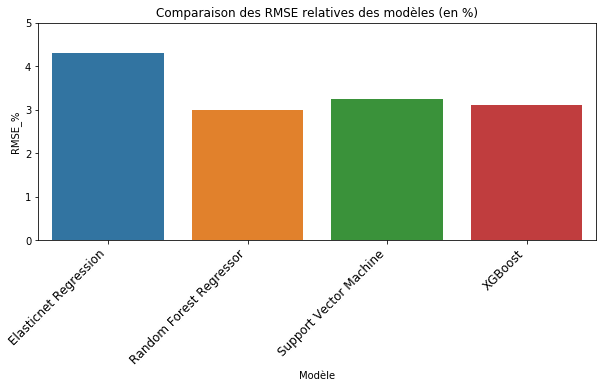

In [60]:
plt.figure(figsize=(10,4))
plt.title('Comparaison des RMSE relatives des modèles (en %)')
chart = sns.barplot(x = results['Modèle'],
           y = results['RMSE_%']*100)
chart.set_xticklabels(labels = results['Modèle'], 
                      rotation=45,
                     horizontalalignment='right',
                     size=12,
                     )
ax = plt.gca()
ax.set_ylim([0, 5])
plt.show()

XGBoost et Random Forest Regressor sont les modèles avec la plus faible RMSE, avec une valeur très proche.

Regardons quel algorithme est entraîné le plus rapidement et prédit le plus rapidement, pour voir lequel sélectionner pour les étapes suivantes

Comparaison avec la RMSE pour un estimateur donnant la valeur moyenne

In [61]:
math.sqrt(mean_squared_error(y_train.mean()*np.ones(y_test.shape[0]), y_test))

1.4973121860465213

In [62]:
rfr_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=500,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

le modèle Random Forest semble plus rapide à entraîner

In [68]:
list(dict_modeles.keys())

['Elastic Net',
 'Random Forest Regressor',
 'SVM',
 'XGBoost',
 'models\\Elastic Net.obj',
 'models\\Random Forest Regressor.obj',
 'models\\rfr_emissions.obj',
 'models\\SVM.obj',
 'models\\XGBoost.obj']

In [69]:
from sklearn.metrics import r2_score, mean_absolute_error


nom_modeles = ['Elastic Net', 'Random Forest Regressor', 'SVM', 'XGBoost']
liste_modeles = [dict_modeles['models\\Elastic Net.obj'],
                 dict_modeles['models\\Random Forest Regressor.obj'],
                 dict_modeles['models\\SVM.obj'],
                 dict_modeles['models\\XGBoost.obj']
                ]

comparaison_score = pd.DataFrame(index = nom_modeles, columns = ['RMSE', 'R2', 'RMSE_relative'])

for nom_modele, modele in zip(nom_modeles, liste_modeles):
    comparaison_score.loc[nom_modele, 'RMSE'] = math.sqrt(mean_squared_error(y_test, modele.predict(X_test)))
    comparaison_score.loc[nom_modele, 'R2'] = r2_score(y_test, modele.predict(X_test))

#normalisation RMSE
comparaison_score['RMSE_relative'] = comparaison_score['RMSE'].divide(comparaison_score['RMSE'].max())

In [70]:
comparaison_score

,RMSE,R2,RMSE_relative
Elastic Net,0.906957,0.631751,1
Random Forest Regressor,0.630444,0.822065,0.69512
SVM,0.685175,0.78983,0.755466
XGBoost,0.653062,0.809069,0.720058


In [88]:
i=0
for modele in liste_modeles:
    print(nom_modeles[i], ': ')
    i+=1
    %timeit modele.predict(X_train)
    print('')

Elastic Net : 
5.32 ms ± 1.17 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)

Random Forest Regressor : 
640 ms ± 16.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

SVM : 
2.14 s ± 54.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

XGBoost : 
145 ms ± 14.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)



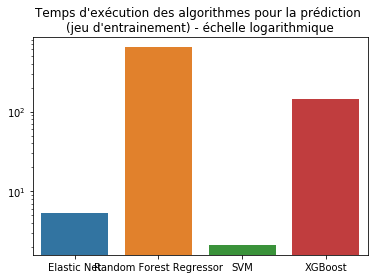

In [93]:
plt.title('Temps d\'exécution des algorithmes pour la prédiction \n(jeu d\'entrainement) - échelle logarithmique')
sns.barplot(x=nom_modeles,
           y = [5.32, 640, 2.14, 145])
ax = plt.gca()
ax.set_yscale('log')

le temps d'exécution de XGBoost est plus faible que celui de random forest (4 fois plus faible), ce pourrait être un critère pour choisir éventuellement le XGBoost plutôt que le Random Forest Regressor (quite à dégrader légèrement la performance)

In [71]:
comparaison_score_melt = pd.melt(comparaison_score.reset_index(), id_vars = ['index'], value_name = 'score', value_vars=['R2', 'RMSE_relative'])

Text(0.5, 1.0, 'Comparaison des performances des modèles (jeu de test)')

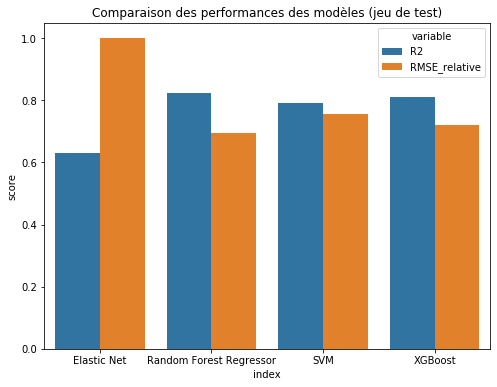

In [72]:
plt.figure(figsize=(8,6))
sns.barplot(x = comparaison_score_melt['index'],
            y = comparaison_score_melt['score'], hue = comparaison_score_melt['variable'])
plt.title('Comparaison des performances des modèles (jeu de test)')

# Vérification des prédictions

Regardons avec un exemple ce que donne la prédiction

In [73]:
X_extrait = X_test
y_extrait = y_test

In [74]:
X_extrait.head()

,NumberofBuildings,NumberofFloors,LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,Latitude,Longitude,x0_Campus,x0_Multifamily HR (10+),x0_Multifamily LR (1-4),x0_Multifamily MR (5-9),x0_NonResidential,x0_Nonresidential COS,x0_Nonresidential WA,x0_SPS-District K-12,x1_Education,x1_Facility,x1_Health,x1_Leisure,x1_Office,x1_Offices,x1_Other,x1_Residence/Hotel/Senior Care/Housing,x1_Retail,x1_Storage,x1_Supermarket / Grocery Store,x1_Warehouse,x2_BALLARD,x2_CENTRAL,x2_DELRIDGE,x2_DOWNTOWN,x2_EAST,x2_GREATER DUWAMISH,x2_LAKE UNION,x2_MAGNOLIA / QUEEN ANNE,x2_NORTH,x2_NORTHEAST,x2_NORTHWEST,x2_SOUTHEAST,x2_SOUTHWEST,x3_Education,x3_Facility,x3_Health,x3_Leisure,x3_Office,x3_Offices,x3_Other,x3_Parking,"x3_Personal Services (Health/Beauty, Dry Cleaning, etc)",x3_Residence/Hotel/Senior Care/Housing,x3_Retail,x3_Storage,x4_Education,x4_Facility,x4_Health,x4_Leisure,x4_Office,x4_Offices,x4_Other,x4_Parking,"x4_Personal Services (Health/Beauty, Dry Cleaning, etc)",x4_Residence/Hotel/Senior Care/Housing,x4_Retail,x4_Storage,x5_Education,x5_Facility,x5_Health,x5_Leisure,x5_Office,x5_Offices,x5_Other,x5_Parking,"x5_Personal Services (Health/Beauty, Dry Cleaning, etc)",x5_Residence/Hotel/Senior Care/Housing,x5_Retail,x5_Storage,x6_High Outlier,x6_Low Outlier,x6_Normal
1703,-0.034419,-0.328997,-0.540707,-0.308135,-0.159065,1.480401,0.670863,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
5240,-0.034419,0.762691,0.633714,0.803847,-0.159065,-0.493824,0.349614,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
5471,-0.034419,-0.601920,-0.422841,-0.362042,-0.159065,-0.043409,1.742348,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
4210,-0.034419,-0.328997,-0.513409,-0.362042,-0.159065,2.244934,0.274828,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1480,-0.034419,-0.874842,-0.586135,-0.298820,-0.159065,-1.098073,-0.573856,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1


In [75]:
y_extrait.head()

1703    19.335591
5240    22.219276
5471    20.799023
4210    20.276983
1480    18.141942
Name: Log2-SiteEnergyUseWN(kBtu), dtype: float64

In [156]:
prediction = dict_modeles_new['Random Forest Regressor'].predict(X_extrait)

Ramenons la prédiction à l'unité qu'on cherche à prédire (inverse du log2(y+1) soit exp2(y)-1

In [157]:
pd.DataFrame(prediction).isna().sum()

0    0
dtype: int64

In [158]:
type(y_extrait)

pandas.core.series.Series

In [159]:
predictions = pd.DataFrame([y_extrait, 
                            pd.Series(prediction, index = y_extrait.index),
                           np.exp2(y_extrait)-1,
                           np.exp2(pd.Series(prediction, index = y_extrait.index))-1]).T
predictions.columns = ['y_log', 'y_predict_log', 'y','y_predict']

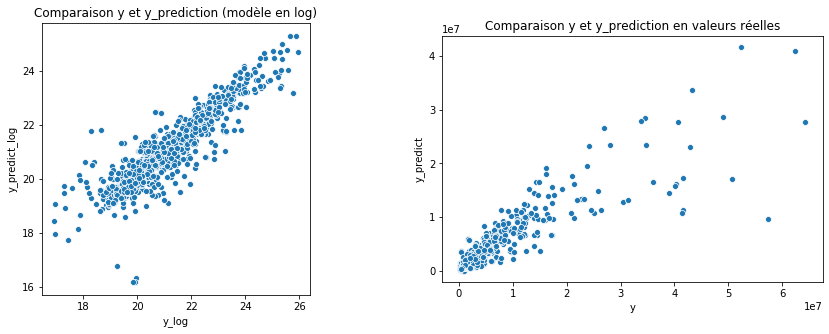

In [160]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5), sharey=False)
sns.scatterplot(x = predictions['y_log'],
               y = predictions['y_predict_log'],
               ax = ax1)
sns.scatterplot(x = predictions['y'],
               y = predictions['y_predict'],
               ax=ax2)
ax1.set_aspect('equal', 'box')

ax2.set_aspect('equal', 'box')

ax1.title.set_text('Comparaison y et y_prediction (modèle en log)')
ax2.title.set_text('Comparaison y et y_prediction en valeurs réelles')


# Pertinence des variables

## Permutations des variables

Afin de voir si toutes les features ont de l'influence sur nos resultats, essayons de voir l'influence sur notre métrique dans le cas de permutations des features et d'application de notre modèle de prédiction.

3 fonctions ont été testées. La dernière (permutation finale) est la plus pertinente.

Updates:
- permutation par ligne dans le one hot encoding (et non par colonne)
- utilisation du jeu de validation et non le jeu de  test
- mean squared error comme metrics
- cross validation à 3

In [84]:
X_train.shape

(4598, 79)

In [85]:
X_test.shape

(1150, 79)

In [94]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.model_selection import cross_val_score

#on créee un dictionnaire pour les colonnes crées par le OHE, pour les retrouver dans l'application des permutations
text_columns =[] #les noms des colonnes qui correspondent à des vraies features (pré OHE)
prefixes = [] #les préfixes des colonnes liées à l'application du OHE
index_cols = [] #les indices des colonnes qui correspondent aux features pré OHE et à la première colonne de chaque feature du OHE
regex = re.compile(r'x\d_')
for j, column in enumerate(X.columns):
    if regex.search(column):
        if column[:2] not in prefixes:
            prefixes.append(column[:2])
            index_cols.append(j)
    else:
        text_columns.append(column)
        index_cols.append(j)
        
dict_OHE = {}
for prefix in prefixes:
    temp_list = []
    for column in X.columns:
        if prefix in column:
            temp_list.append(column)
    dict_OHE[prefix] = temp_list
    text_columns.append(prefix)

    
    
#préparation du jeu de données

X_train_permut, X_validation_permut, y_train_permut, y_validation = train_test_split(X_train,
                                        y_train,
                                        test_size=0.2,
                                        random_state=42
                                        )
#choix du modèle utilisé pour la permutation : 


#on boucle sur le nombre de features:
list_features = text_columns
features_score = pd.DataFrame({})

for num_feature in range(len(text_columns)):
    print ('\nBoucle {}.'.format(num_feature+1))
    scores = []
    #on entraine le modèle sur le jeu de données sans les éventuelles features supprimées
    model = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=500,
                      n_jobs=-1, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)
    
    #pour chaque feature de X_test:
    for j, feature in zip(index_cols, list_features):
        
        X_validation_temp = X_validation_permut.copy()
        
        #si on identifie une feature en "X0_" : on fait une permutation sur plusieurs colonnes

        if regex.search(X_validation_permut.iloc[:,j].name):
            #print('chaine reconnue')
            prefixe = X_validation_permut.iloc[:,j].name[:2]
            for prefixe_col in dict_OHE[prefixe]:
                index_col = X_validation_permut.columns.get_loc(prefixe_col)
                X_columns_temp = X_validation_temp.iloc[:,index_col]
                #X_test_temp.iloc[:,index_col] = np.random.permutation(X_test_temp.iloc[:,index_col])
                #on permute l'ensemble du bloc du one hot encoding, ligne par ligne (pour ne pas voir plus de une valeur à 1 par ligne)
                #X_validation_temp.iloc[:,index_col] = np.take(X_columns_temp,
                #                                        np.random.permutation(X_columns_temp.shape[0]),
                #                                        axis=0,
                #                                        out=X_columns_temp)
                
                X_validation_temp.iloc[:,index_col] = np.random.permutation(X_columns_temp.T).T
                         
        #sinon on fait une permutation sur une seule colonne
        else:             
            X_validation_temp.iloc[:,j] = np.random.permutation(X_validation_temp.iloc[:,j])
        
        #entrainement du modèle / ajout du score
        scores.append(cross_val_score(model, 
                                      X_validation_temp, 
                                      y_validation, 
                                      cv=3, #################################################TEMP A MODIFIER !!
                                      scoring = 'neg_mean_squared_error',
                                      n_jobs = -1).mean())
        print('    j : {}, feature : {}, score : {}'.format(j, feature, scores[-1]))
        
    #on identifie la feature avec la RMSE la plus faible en valeur absolue
    #i.e. la feature qui a le moins d'impact sur le score
    feature_to_remove_index = scores.index(max(scores))
    
    
    #on stocke le nom de la feature et le score
    feature_name = X_train_permut.columns[index_cols[feature_to_remove_index]]
    print('feature name : ', feature_name)
    if regex.search(feature_name):
        feature_name = feature_name[:3]
        print('feature name : ', feature_name)

    features_score = pd.concat([features_score,
               pd.DataFrame({''
                   'feature' : feature_name,
                             'RMSE' : scores[feature_to_remove_index]
                            }, index = [0])
                               ])
    #Affichage des informations
    print ('\nBoucle {}. Feature {} supprimée  : score = {}'.format(
        num_feature+1, 
        list_features[feature_to_remove_index],
        scores[feature_to_remove_index], 
        min(scores)))
                
    #on identifie les numero de colonne des features à supprimer:
    
    if regex.search(feature_name):
        print('      indice colonne de base à supprimer : ', index_cols[feature_to_remove_index])
        print('      indice de la colonne correspondant à la prochaine feature OHE', index_cols[feature_to_remove_index]+len(dict_OHE[feature_name[:2]]))
        liste_index = list(
            range(index_cols[feature_to_remove_index],
                  index_cols[feature_to_remove_index]+len(dict_OHE[feature_name[:2]])
                  ,1)
        )
    else:
        liste_index = index_cols[feature_to_remove_index]
    #on actualise la liste des features avec la feature en moins pour le prochain tour de boucle
    for k, indice in enumerate(index_cols):
        if index_cols.index(indice) > feature_to_remove_index:
            if type(liste_index) is int :
                index_cols[k] -= 1
            else:
                index_cols[k] -= len(liste_index)
        
    print('      index à supprimer ', liste_index)
    
    del list_features[feature_to_remove_index]
    if regex.search(feature_name):
        del dict_OHE[feature_name[:2]]
        
    del index_cols[feature_to_remove_index]
    
    print('      feature to remove index' , liste_index)
    print('      Colonnes supprimées : ', X_train_permut.columns[liste_index])
    X_train_permut.drop(X_train_permut.columns[liste_index] , axis = 1, inplace=True)
    X_validation_permut.drop(X_validation_permut.columns[liste_index] , axis = 1, inplace=True)
    #print(X_train_permut.columns)
    


Boucle 1.
    j : 0, feature : NumberofBuildings, score : -2.078531205996591
    j : 1, feature : NumberofFloors, score : -2.1419651468632943
    j : 2, feature : LargestPropertyUseTypeGFA, score : -2.401123678704693
    j : 3, feature : SecondLargestPropertyUseTypeGFA, score : -1.9741489374807275
    j : 4, feature : ThirdLargestPropertyUseTypeGFA, score : -1.9784049619114097
    j : 5, feature : Latitude, score : -2.116723060539106
    j : 6, feature : Longitude, score : -2.0924157328456197
    j : 7, feature : x0, score : -2.142107362058052
    j : 15, feature : x1, score : -2.147937377817454
    j : 27, feature : x2, score : -2.092519964253404
    j : 40, feature : x3, score : -2.2749698753507226
    j : 52, feature : x4, score : -2.236712317470262
    j : 64, feature : x5, score : -1.965656830447229
    j : 76, feature : x6, score : -2.0028404806617646
feature name :  x5_Education
feature name :  x5_

Boucle 1. Feature x5 supprimée  : score = -1.965656830447229
      indice colon

C:\Users\Vincent\Anaconda3\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


    j : 0, feature : NumberofBuildings, score : -2.0212730950254048
    j : 1, feature : NumberofFloors, score : -2.043714523934858
    j : 2, feature : LargestPropertyUseTypeGFA, score : -2.542101773897549
    j : 3, feature : SecondLargestPropertyUseTypeGFA, score : -1.9808835530063627
    j : 4, feature : ThirdLargestPropertyUseTypeGFA, score : -1.9407486700001548
    j : 5, feature : Latitude, score : -2.202066336573416
    j : 6, feature : Longitude, score : -1.8922230124797617
    j : 7, feature : x0, score : -2.1651590338279365
    j : 15, feature : x1, score : -2.143329073755533
    j : 27, feature : x2, score : -2.099393340529297
    j : 40, feature : x3, score : -1.9784696563146404
    j : 52, feature : x4, score : -1.9247017114021263
    j : 64, feature : x6, score : -1.93986347181466
feature name :  Longitude

Boucle 2. Feature Longitude supprimée  : score = -1.8922230124797617
      index à supprimer  6
      feature to remove index 6
      Colonnes supprimées :  Longitude

    j : 0, feature : NumberofFloors, score : -2.4014570818936076
    j : 1, feature : LargestPropertyUseTypeGFA, score : -2.749613349956373
    j : 2, feature : Latitude, score : -2.7334993827673295
    j : 3, feature : x0, score : -2.216570240822944
    j : 11, feature : x3, score : -2.4908294157249586
feature name :  x0_Campus
feature name :  x0_

Boucle 10. Feature x0 supprimée  : score = -2.216570240822944
      indice colonne de base à supprimer :  3
      indice de la colonne correspondant à la prochaine feature OHE 11
      index à supprimer  [3, 4, 5, 6, 7, 8, 9, 10]
      feature to remove index [3, 4, 5, 6, 7, 8, 9, 10]
      Colonnes supprimées :  Index(['x0_Campus', 'x0_Multifamily HR (10+)', 'x0_Multifamily LR (1-4)',
       'x0_Multifamily MR (5-9)', 'x0_NonResidential', 'x0_Nonresidential COS',
       'x0_Nonresidential WA', 'x0_SPS-District K-12'],
      dtype='object')

Boucle 11.
    j : 0, feature : NumberofFloors, score : -2.300910727072924
    j : 1, feature : Larg

In [95]:
features_score

,feature,RMSE
0,x5_,-1.965657
0,Longitude,-1.892223
0,x1_,-1.907689
0,x4_,-1.981049
0,NumberofBuildings,-1.968820
0,SecondLargestPropertyUseTypeGFA,-2.100474
0,x6_,-2.028213
0,ThirdLargestPropertyUseTypeGFA,-1.973343
0,x2_,-2.018199
0,x0_,-2.216570


In [96]:
graphe_features = features_score.reset_index().drop(['index'], axis=1).reset_index()
graphe_features['index'] +=1
graphe_features['RMSE'] = (abs(graphe_features['RMSE'])).apply(math.sqrt)

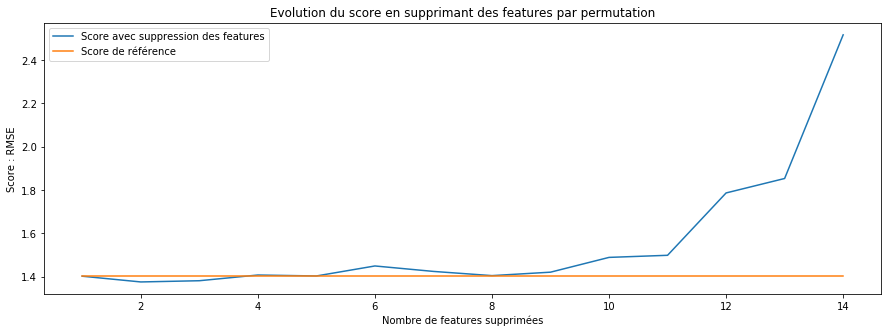

In [97]:
import seaborn as sns
plt.figure(figsize=(15,5))
plt.title('Evolution du score en supprimant des features par permutation')
sns.lineplot( x = graphe_features['index'].values,
            y = graphe_features["RMSE"])
sns.lineplot([1,graphe_features.shape[0]],[graphe_features.iloc[0,2], graphe_features.iloc[0,2]])
plt.xlabel('Nombre de features supprimées')
plt.ylabel('Score : RMSE')
plt.legend(['Score avec suppression des features',
           'Score de référence'])
ax = plt.gca()


plt.show()

Observations :
* On n'observe un minima local pour x = 2 (soit 2 features supprimées). On peut supprimer 5 features en améliorant un peu le modèle.
* on observe qu'on peut supprimer jusqu'à 8 features avec un impact marginal sur le score
* on observe que la suppression des 5 dernières features est particulièrement impactante


In [98]:
graphe_features['feature'].replace({
    'x0_' : 'BuildingType', 
    'x1_' : 'PrimaryPropertyType',
    'x2_' : 'Neighborhood',
    'x3_' : 'LargestPropertyUseType',
    'x4_' : 'SecondLargestPropertyUseType',
    'x5_' : 'ThirdLargestPropertyUseType', 
    'x6_' : 'Outlier'
}, inplace=True)

Le graphe ci-dessus peut être également affiché sous la façon suivante, en affichant le nom des features identifier leur importance relative

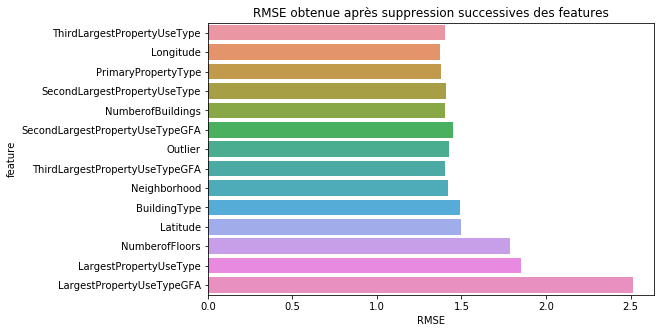

In [99]:
plt.figure(figsize=(8,5))
plt.title('RMSE obtenue après suppression successives des features')
sns.barplot(x = graphe_features['RMSE'],
           y = graphe_features['feature'])
plt.show()

### Bilan des permutations

Les résultats obtenus ci-dessus sont assez cohérents avec l'enjeu de la 
* les 2 features les plus significatives sont la surface dédiée à l'usage principal du bâtiment et son usage principal.
* La latitude a plus d'importance que la longitude. C'est peut être lié à la configuration de la ville, dont la distance nord sud est plus importante que la distance est-ouest (voir représentation cartographique dans l'analyse de données).
* certaines features sont d'importance moyenne : type de bâtiment, nombre de bâtiments, nombre d'étages 3ème type d'usage. 

Pour simplifier la collecte de données, on pourrait éventuellement réduire notre jeu de données aux features suivantes avec une dégradation minimale du score :
* LargestPropertyUseTypeGFA
* LargestPropertyUseType
* Numberoffloors
* Latitude
* Building Type

On ourrait aussi légèrement améliorer le modèle en supprimant les 5 features suivantes du jeu de données: 
* ThirdLargestPropertyUseType
* Longitude
* PrimaryPropertyType

## Méthode Ascendante

Contraire de la méthode par permutation : à chaque tour de boucle, on teste l'ajout d'une feature et on garde la feature qui améliore le plus le score. On boucle sur toutes les features jusqu'à toutes les avoir intégrées 

sur le principe la méthode fonctionne mais il faurait la reprendre avec les mêmes mises mise à jour que les permutations : cross validation et sélection par lot de features du one hot encoding

In [ ]:
'''import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#Boucle i sur le nombre de features:
    #boucle j sur le nombre de features:
        #fit du modèle avec i+1 features (feature pré sélectionnées + chaque feature 1 à 1) sur jeu de training
        #calcul du score sur jeu de test
    #on garde la feature j avec le plus petit score
    
#variables
X_train_ascend = pd.DataFrame(np.ones(X_train.shape[0]))
X_test_ascend = pd.DataFrame(np.ones(X_test.shape[0]))

#choix du modèle utilisé : 

#model = xgb_grid.best_estimator_
model = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=2000,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=0)

#définition des paramètres
list_features = list(range(X_test.shape[1])) #liste d'entiers
features_score_asc = []
features_kept = []
features_score = []

for i in list_features:
    scores = []
    features_left = list(set(list_features) - set(features_kept)) # liste d'entiers 
    print('features_left', len(features_left))
    for j in features_left:
        #on entraine le modèle avec la feature supplémentaire
        #print('X_train_ascend : ',X_train_ascend.shape)
        #print('X_train ', X_train.shape)
        #print('X_train.iloc[:,j] ', X_train.iloc[:,j].shape)
        #print('y_train ', y_train.shape)
        #print('concat : ', pd.concat([X_train_ascend,pd.DataFrame(X_train.iloc[:,j]).reset_index(drop=True)],axis=1).shape)
        
        
        model.fit(
            pd.concat(
                [X_train_ascend,
                 pd.DataFrame(X_train.copy().iloc[:,j]).reset_index(drop=True)
                ],axis=1),
            y_train)
        
        #on enregistre le score de ce modèle
        scores.append(
            math.sqrt(
                mean_squared_error(
                    model.predict(
                        pd.concat([X_test_ascend,
                                   pd.DataFrame(X_test.iloc[:,j]).reset_index(drop=True)
                                  ],axis=1)),
                    y_test)
            )
        )
        
        
    #sauvegarde de la feature et de son score
    features_score_asc.append(min(scores))
    feature_kept_index = scores.index(min(scores))
    features_kept.append(features_left[feature_kept_index]) #on enregistre la feature dans feature kept
    
    #mise à jour du jeu de données avec la feature supplémentaire
    X_train_ascend = pd.concat([X_train_ascend, 
                                pd.DataFrame(X_train.iloc[:, features_left[feature_kept_index]
                                                         ]).reset_index(drop=True)], axis=1)
    X_test_ascend  = pd.concat([X_test_ascend,
                                pd.DataFrame(X_test.iloc[:,  features_left[feature_kept_index]
                                                        ]).reset_index(drop=True)], axis=1)
    
    print('Tour {}. Feature ajoutée : {}. Score : {}'.format(i+1, features_kept[-1], features_score_asc[-1]))

asc_score = pd.DataFrame({'Feature' : features_kept,
                          'Score' : features_score_asc})'''

# Modèle Emissions

In [100]:
y2 = data.copy()[{'SiteEnergyUseWN(kBtu)', 'TotalGHGEmissions' , 'Log2-SiteEnergyUseWN(kBtu)'}]
X2 = data.copy().drop(['SiteEnergyUseWN(kBtu)', 'TotalGHGEmissions', 'Log2-SiteEnergyUseWN(kBtu)'], axis=1)

In [101]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

ohe = OneHotEncoder(sparse=False)
ss = StandardScaler()
X2[numerical_columns] = ss.fit_transform(X2[numerical_columns])
ohe.fit_transform(X2[categorical_columns])

X2 = pd.merge(X[numerical_columns], 
          pd.DataFrame(columns = ohe.get_feature_names().tolist(),
              data = ohe.fit_transform(X2[categorical_columns])),
        left_index = True, right_index = True)

In [102]:
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = \
                        train_test_split(X2, 
                                         y['TotalGHGEmissions'],  
                                         test_size = 0.3, 
                                         random_state = 42
                                        )


In [103]:
from sklearn.ensemble import RandomForestRegressor

parameters = {
    'n_estimators' : [10,50,100,300,500], #nombre d'arbres de décision
    'min_samples_leaf' : [1,3,5,10], #nombre de feuilles minimales dans un noeud
    'max_features': ['auto', 'sqrt'] #nombre de features observées pour chaque arbre
}



In [104]:
rfr_emissions = GridSearchCV(RandomForestRegressor(),
                               param_grid = parameters,
                               #scoring='mean_squared_error',
                              verbose=2,
                               cv=5)

rfr_emissions.fit(X_train2, y_train2)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV] max_features=auto, min_samples_leaf=1, n_estimators=10 ..........


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_features=auto, min_samples_leaf=1, n_estimators=10, total=   0.5s
[CV] max_features=auto, min_samples_leaf=1, n_estimators=10 ..........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV]  max_features=auto, min_samples_leaf=1, n_estimators=10, total=   0.4s
[CV] max_features=auto, min_samples_leaf=1, n_estimators=10 ..........
[CV]  max_features=auto, min_samples_leaf=1, n_estimators=10, total=   0.5s
[CV] max_features=auto, min_samples_leaf=1, n_estimators=10 ..........
[CV]  max_features=auto, min_samples_leaf=1, n_estimators=10, total=   0.4s
[CV] max_features=auto, min_samples_leaf=1, n_estimators=10 ..........
[CV]  max_features=auto, min_samples_leaf=1, n_estimators=10, total=   0.4s
[CV] max_features=auto, min_samples_leaf=1, n_estimators=50 ..........
[CV]  max_features=auto, min_samples_leaf=1, n_estimators=50, total=   2.3s
[CV] max_features=auto, min_samples_leaf=1, n_estimators=50 ..........
[CV]  max_features=auto, min_samples_leaf=1, n_estimators=50, total=   2.2s
[CV] max_features=auto, min_samples_leaf=1, n_estimators=50 ..........
[CV]  max_features=auto, min_samples_leaf=1, n_estimators=50, total=   1.9s
[CV] max_features=auto, min_samples_leaf=1

[CV]  max_features=auto, min_samples_leaf=5, n_estimators=50, total=   2.1s
[CV] max_features=auto, min_samples_leaf=5, n_estimators=50 ..........
[CV]  max_features=auto, min_samples_leaf=5, n_estimators=50, total=   1.9s
[CV] max_features=auto, min_samples_leaf=5, n_estimators=50 ..........
[CV]  max_features=auto, min_samples_leaf=5, n_estimators=50, total=   1.9s
[CV] max_features=auto, min_samples_leaf=5, n_estimators=100 .........
[CV]  max_features=auto, min_samples_leaf=5, n_estimators=100, total=   3.9s
[CV] max_features=auto, min_samples_leaf=5, n_estimators=100 .........
[CV]  max_features=auto, min_samples_leaf=5, n_estimators=100, total=   4.1s
[CV] max_features=auto, min_samples_leaf=5, n_estimators=100 .........
[CV]  max_features=auto, min_samples_leaf=5, n_estimators=100, total=   4.0s
[CV] max_features=auto, min_samples_leaf=5, n_estimators=100 .........
[CV]  max_features=auto, min_samples_leaf=5, n_estimators=100, total=   4.0s
[CV] max_features=auto, min_samples_le

[CV]  max_features=sqrt, min_samples_leaf=1, n_estimators=100, total=   1.6s
[CV] max_features=sqrt, min_samples_leaf=1, n_estimators=100 .........
[CV]  max_features=sqrt, min_samples_leaf=1, n_estimators=100, total=   1.6s
[CV] max_features=sqrt, min_samples_leaf=1, n_estimators=300 .........
[CV]  max_features=sqrt, min_samples_leaf=1, n_estimators=300, total=   5.0s
[CV] max_features=sqrt, min_samples_leaf=1, n_estimators=300 .........
[CV]  max_features=sqrt, min_samples_leaf=1, n_estimators=300, total=   4.7s
[CV] max_features=sqrt, min_samples_leaf=1, n_estimators=300 .........
[CV]  max_features=sqrt, min_samples_leaf=1, n_estimators=300, total=   4.9s
[CV] max_features=sqrt, min_samples_leaf=1, n_estimators=300 .........
[CV]  max_features=sqrt, min_samples_leaf=1, n_estimators=300, total=   4.7s
[CV] max_features=sqrt, min_samples_leaf=1, n_estimators=300 .........
[CV]  max_features=sqrt, min_samples_leaf=1, n_estimators=300, total=   4.9s
[CV] max_features=sqrt, min_samples

[CV]  max_features=sqrt, min_samples_leaf=5, n_estimators=300, total=   2.4s
[CV] max_features=sqrt, min_samples_leaf=5, n_estimators=500 .........
[CV]  max_features=sqrt, min_samples_leaf=5, n_estimators=500, total=   4.1s
[CV] max_features=sqrt, min_samples_leaf=5, n_estimators=500 .........
[CV]  max_features=sqrt, min_samples_leaf=5, n_estimators=500, total=   3.8s
[CV] max_features=sqrt, min_samples_leaf=5, n_estimators=500 .........
[CV]  max_features=sqrt, min_samples_leaf=5, n_estimators=500, total=   4.0s
[CV] max_features=sqrt, min_samples_leaf=5, n_estimators=500 .........
[CV]  max_features=sqrt, min_samples_leaf=5, n_estimators=500, total=   4.1s
[CV] max_features=sqrt, min_samples_leaf=5, n_estimators=500 .........
[CV]  max_features=sqrt, min_samples_leaf=5, n_estimators=500, total=   4.1s
[CV] max_features=sqrt, min_samples_leaf=10, n_estimators=10 .........
[CV]  max_features=sqrt, min_samples_leaf=10, n_estimators=10, total=   0.1s
[CV] max_features=sqrt, min_samples

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed: 18.0min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'max_features': ['auto', 'sqrt'

In [106]:
model_emissions = rfr_emissions.best_estimator_

Export du modèle

In [107]:
filename = 'models/' + 'rfr_emissions' + '.obj' 
with  open(filename, 'wb') as filehandler :
    pickle.dump(model_emissions, filehandler)

In [108]:
math.sqrt(mean_squared_error(model_emissions.predict(X_test2), y_test2))

103.511951258427

In [109]:
math.sqrt(mean_squared_error(model_emissions.predict(X_test2), y_test2))/y_test2.mean()

1.229347595647134

23 % d'écart de la RMSE à la moyenne du jeu de test

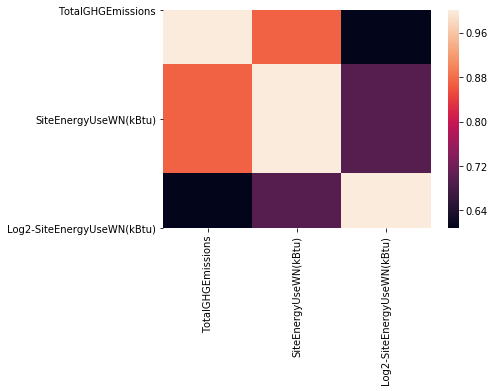

In [110]:
sns.heatmap(y2.corr())

On observe que les variables d'émissions et de consommation sont fortement corrélées (coefficient de 0,72). Voyons si nous pouvons entrainer un modèle d'estimation des émissions à partir de la sortie du modèle de prédiction des consommations

In [114]:
rfr_emissions_court = GridSearchCV(RandomForestRegressor(n_jobs=-1),
                               param_grid = parameters,
                               #scoring='mean_squared_error',
                              verbose=2,
                               cv=5)

In [116]:
rfr_emissions_court.fit(np.vstack([dict_modeles_new['Random Forest Regressor'].predict(X_train2), np.ones(X_train2.shape[0])]).T,
                          y_train2)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV] max_features=auto, min_samples_leaf=1, n_estimators=10 ..........


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_features=auto, min_samples_leaf=1, n_estimators=10, total=   6.9s
[CV] max_features=auto, min_samples_leaf=1, n_estimators=10 ..........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.8s remaining:    0.0s


[CV]  max_features=auto, min_samples_leaf=1, n_estimators=10, total=   6.5s
[CV] max_features=auto, min_samples_leaf=1, n_estimators=10 ..........
[CV]  max_features=auto, min_samples_leaf=1, n_estimators=10, total=   5.3s
[CV] max_features=auto, min_samples_leaf=1, n_estimators=10 ..........
[CV]  max_features=auto, min_samples_leaf=1, n_estimators=10, total=   5.4s
[CV] max_features=auto, min_samples_leaf=1, n_estimators=10 ..........
[CV]  max_features=auto, min_samples_leaf=1, n_estimators=10, total=   5.3s
[CV] max_features=auto, min_samples_leaf=1, n_estimators=50 ..........
[CV]  max_features=auto, min_samples_leaf=1, n_estimators=50, total=   5.4s
[CV] max_features=auto, min_samples_leaf=1, n_estimators=50 ..........
[CV]  max_features=auto, min_samples_leaf=1, n_estimators=50, total=   5.6s
[CV] max_features=auto, min_samples_leaf=1, n_estimators=50 ..........
[CV]  max_features=auto, min_samples_leaf=1, n_estimators=50, total=   6.6s
[CV] max_features=auto, min_samples_leaf=1

[CV]  max_features=auto, min_samples_leaf=5, n_estimators=50, total=   6.7s
[CV] max_features=auto, min_samples_leaf=5, n_estimators=50 ..........
[CV]  max_features=auto, min_samples_leaf=5, n_estimators=50, total=   6.5s
[CV] max_features=auto, min_samples_leaf=5, n_estimators=50 ..........
[CV]  max_features=auto, min_samples_leaf=5, n_estimators=50, total=   7.4s
[CV] max_features=auto, min_samples_leaf=5, n_estimators=100 .........
[CV]  max_features=auto, min_samples_leaf=5, n_estimators=100, total=   7.8s
[CV] max_features=auto, min_samples_leaf=5, n_estimators=100 .........
[CV]  max_features=auto, min_samples_leaf=5, n_estimators=100, total=   6.6s
[CV] max_features=auto, min_samples_leaf=5, n_estimators=100 .........
[CV]  max_features=auto, min_samples_leaf=5, n_estimators=100, total=   6.1s
[CV] max_features=auto, min_samples_leaf=5, n_estimators=100 .........
[CV]  max_features=auto, min_samples_leaf=5, n_estimators=100, total=   5.9s
[CV] max_features=auto, min_samples_le

[CV]  max_features=sqrt, min_samples_leaf=1, n_estimators=100, total=   7.2s
[CV] max_features=sqrt, min_samples_leaf=1, n_estimators=100 .........
[CV]  max_features=sqrt, min_samples_leaf=1, n_estimators=100, total=   6.5s
[CV] max_features=sqrt, min_samples_leaf=1, n_estimators=300 .........
[CV]  max_features=sqrt, min_samples_leaf=1, n_estimators=300, total=   7.6s
[CV] max_features=sqrt, min_samples_leaf=1, n_estimators=300 .........
[CV]  max_features=sqrt, min_samples_leaf=1, n_estimators=300, total=   7.7s
[CV] max_features=sqrt, min_samples_leaf=1, n_estimators=300 .........
[CV]  max_features=sqrt, min_samples_leaf=1, n_estimators=300, total=  10.1s
[CV] max_features=sqrt, min_samples_leaf=1, n_estimators=300 .........
[CV]  max_features=sqrt, min_samples_leaf=1, n_estimators=300, total=   7.9s
[CV] max_features=sqrt, min_samples_leaf=1, n_estimators=300 .........
[CV]  max_features=sqrt, min_samples_leaf=1, n_estimators=300, total=   8.0s
[CV] max_features=sqrt, min_samples

[CV]  max_features=sqrt, min_samples_leaf=5, n_estimators=300, total=   7.6s
[CV] max_features=sqrt, min_samples_leaf=5, n_estimators=500 .........
[CV]  max_features=sqrt, min_samples_leaf=5, n_estimators=500, total=   8.1s
[CV] max_features=sqrt, min_samples_leaf=5, n_estimators=500 .........
[CV]  max_features=sqrt, min_samples_leaf=5, n_estimators=500, total=   7.5s
[CV] max_features=sqrt, min_samples_leaf=5, n_estimators=500 .........
[CV]  max_features=sqrt, min_samples_leaf=5, n_estimators=500, total=   7.7s
[CV] max_features=sqrt, min_samples_leaf=5, n_estimators=500 .........
[CV]  max_features=sqrt, min_samples_leaf=5, n_estimators=500, total=   7.8s
[CV] max_features=sqrt, min_samples_leaf=5, n_estimators=500 .........
[CV]  max_features=sqrt, min_samples_leaf=5, n_estimators=500, total=   8.1s
[CV] max_features=sqrt, min_samples_leaf=10, n_estimators=10 .........
[CV]  max_features=sqrt, min_samples_leaf=10, n_estimators=10, total=   5.5s
[CV] max_features=sqrt, min_samples

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed: 22.3min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=-1,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'max_features': ['auto', 'sqrt'],

In [117]:
math.sqrt(mean_squared_error(rfr_emissions_court.best_estimator_.predict(
    np.vstack([dict_modeles_new['Random Forest Regressor'].predict(X_test2), np.ones(X_test2.shape[0])]).T),
                             y_test2))

103.54582713180557

La RMSE est quasiment égale que dans le cas du modèle avec toutes les features

Essayons en ajoutant en entrée du modèle de prédiction, la prédiction du modèle initial ainsi que les 5 features importantes du modèle initial, selon la permutation

In [123]:
columns_feature_emissions = ['LargestPropertyUseTypeGFA', 'x3_Education', 'x3_Facility', 'x3_Health',
       'x3_Leisure', 'x3_Office', 'x3_Offices', 'x3_Other', 'x3_Parking',
       'x3_Personal Services (Health/Beauty, Dry Cleaning, etc)',
       'x3_Residence/Hotel/Senior Care/Housing', 'x3_Retail', 'x3_Storage', 
                            'NumberofFloors', 'Latitude', 'x0_Campus', 'x0_Multifamily HR (10+)',
       'x0_Multifamily LR (1-4)', 'x0_Multifamily MR (5-9)',
       'x0_NonResidential', 'x0_Nonresidential COS', 'x0_Nonresidential WA',
       'x0_SPS-District K-12']


In [124]:
dict_modeles['Random Forest Regressor'].predict(X_train2).reshape(-1,1).shape

(4023, 1)

In [125]:
X_train2[columns_feature_emissions].shape

(4023, 23)

In [127]:
rfr_emissions_court2 = GridSearchCV(RandomForestRegressor(n_jobs=-1),
                               param_grid = parameters,
                               #scoring='mean_squared_error',
                              verbose=2,
                               cv=5)

rfr_emissions_court2.fit(np.hstack([dict_modeles_new['Random Forest Regressor'].predict(X_train2).reshape(-1,1), X_train2[columns_feature_emissions].to_numpy()]),
                          y_train2)


Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV] max_features=auto, min_samples_leaf=1, n_estimators=10 ..........


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_features=auto, min_samples_leaf=1, n_estimators=10, total=   6.2s
[CV] max_features=auto, min_samples_leaf=1, n_estimators=10 ..........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.1s remaining:    0.0s


[CV]  max_features=auto, min_samples_leaf=1, n_estimators=10, total=   5.6s
[CV] max_features=auto, min_samples_leaf=1, n_estimators=10 ..........
[CV]  max_features=auto, min_samples_leaf=1, n_estimators=10, total=   6.1s
[CV] max_features=auto, min_samples_leaf=1, n_estimators=10 ..........
[CV]  max_features=auto, min_samples_leaf=1, n_estimators=10, total=   5.9s
[CV] max_features=auto, min_samples_leaf=1, n_estimators=10 ..........
[CV]  max_features=auto, min_samples_leaf=1, n_estimators=10, total=   5.5s
[CV] max_features=auto, min_samples_leaf=1, n_estimators=50 ..........
[CV]  max_features=auto, min_samples_leaf=1, n_estimators=50, total=   6.4s
[CV] max_features=auto, min_samples_leaf=1, n_estimators=50 ..........
[CV]  max_features=auto, min_samples_leaf=1, n_estimators=50, total=   6.4s
[CV] max_features=auto, min_samples_leaf=1, n_estimators=50 ..........
[CV]  max_features=auto, min_samples_leaf=1, n_estimators=50, total=   6.7s
[CV] max_features=auto, min_samples_leaf=1

[CV]  max_features=auto, min_samples_leaf=5, n_estimators=50, total=   8.3s
[CV] max_features=auto, min_samples_leaf=5, n_estimators=50 ..........
[CV]  max_features=auto, min_samples_leaf=5, n_estimators=50, total=   7.2s
[CV] max_features=auto, min_samples_leaf=5, n_estimators=50 ..........
[CV]  max_features=auto, min_samples_leaf=5, n_estimators=50, total=   6.1s
[CV] max_features=auto, min_samples_leaf=5, n_estimators=100 .........
[CV]  max_features=auto, min_samples_leaf=5, n_estimators=100, total=   7.6s
[CV] max_features=auto, min_samples_leaf=5, n_estimators=100 .........
[CV]  max_features=auto, min_samples_leaf=5, n_estimators=100, total=   7.8s
[CV] max_features=auto, min_samples_leaf=5, n_estimators=100 .........
[CV]  max_features=auto, min_samples_leaf=5, n_estimators=100, total=   7.0s
[CV] max_features=auto, min_samples_leaf=5, n_estimators=100 .........
[CV]  max_features=auto, min_samples_leaf=5, n_estimators=100, total=  10.0s
[CV] max_features=auto, min_samples_le

[CV]  max_features=sqrt, min_samples_leaf=1, n_estimators=100, total=   2.8s
[CV] max_features=sqrt, min_samples_leaf=1, n_estimators=100 .........
[CV]  max_features=sqrt, min_samples_leaf=1, n_estimators=100, total=   2.8s
[CV] max_features=sqrt, min_samples_leaf=1, n_estimators=300 .........
[CV]  max_features=sqrt, min_samples_leaf=1, n_estimators=300, total=   3.9s
[CV] max_features=sqrt, min_samples_leaf=1, n_estimators=300 .........
[CV]  max_features=sqrt, min_samples_leaf=1, n_estimators=300, total=   6.4s
[CV] max_features=sqrt, min_samples_leaf=1, n_estimators=300 .........
[CV]  max_features=sqrt, min_samples_leaf=1, n_estimators=300, total=   5.0s
[CV] max_features=sqrt, min_samples_leaf=1, n_estimators=300 .........
[CV]  max_features=sqrt, min_samples_leaf=1, n_estimators=300, total=   6.3s
[CV] max_features=sqrt, min_samples_leaf=1, n_estimators=300 .........
[CV]  max_features=sqrt, min_samples_leaf=1, n_estimators=300, total=   5.9s
[CV] max_features=sqrt, min_samples

[CV]  max_features=sqrt, min_samples_leaf=5, n_estimators=300, total=   3.3s
[CV] max_features=sqrt, min_samples_leaf=5, n_estimators=500 .........
[CV]  max_features=sqrt, min_samples_leaf=5, n_estimators=500, total=   3.8s
[CV] max_features=sqrt, min_samples_leaf=5, n_estimators=500 .........
[CV]  max_features=sqrt, min_samples_leaf=5, n_estimators=500, total=   3.9s
[CV] max_features=sqrt, min_samples_leaf=5, n_estimators=500 .........
[CV]  max_features=sqrt, min_samples_leaf=5, n_estimators=500, total=   3.8s
[CV] max_features=sqrt, min_samples_leaf=5, n_estimators=500 .........
[CV]  max_features=sqrt, min_samples_leaf=5, n_estimators=500, total=   3.9s
[CV] max_features=sqrt, min_samples_leaf=5, n_estimators=500 .........
[CV]  max_features=sqrt, min_samples_leaf=5, n_estimators=500, total=   3.8s
[CV] max_features=sqrt, min_samples_leaf=10, n_estimators=10 .........
[CV]  max_features=sqrt, min_samples_leaf=10, n_estimators=10, total=   2.5s
[CV] max_features=sqrt, min_samples

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed: 20.0min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=-1,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'max_features': ['auto', 'sqrt'],

In [128]:
math.sqrt(mean_squared_error(rfr_emissions_court2.predict(
    np.hstack([dict_modeles_new['Random Forest Regressor'].predict(X_test2).reshape(-1,1), 
               X_test2[columns_feature_emissions].to_numpy()])),y_test2))

83.59977748044074

Ce résultat est très satisfaisant : la RMSE est encore plus faible que pour le modèle entraîné initialement sans la consommation.

Export du modèle

In [129]:
filename = 'models/' + 'rfr_emissions' + '.obj' 
with  open(filename, 'wb') as filehandler :
    pickle.dump(rfr_emissions_court2, filehandler)

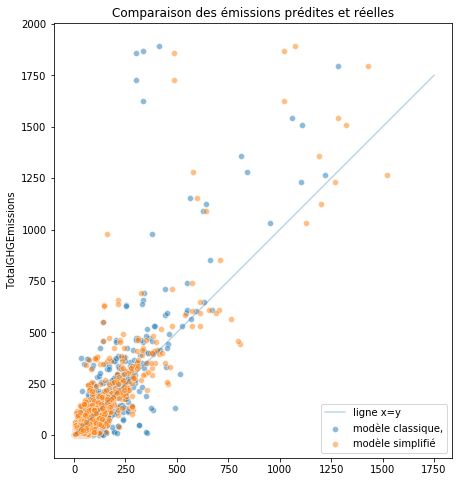

In [130]:
plt.figure(figsize=(8,8))
plt.title('Comparaison des émissions prédites et réelles')
sns.lineplot(x = [0,1750], y = [0,1750], alpha=0.3)
sns.scatterplot(x = model_emissions.predict(X_test2),
                y = y_test2, alpha=0.5)
sns.scatterplot(x = rfr_emissions_court2.predict(np.hstack([dict_modeles['Random Forest Regressor'].predict(X_test2).reshape(-1,1), 
               X_test2[columns_feature_emissions].to_numpy()])),
                y = y_test2, alpha=0.5)
plt.legend(['ligne x=y', 'modèle classique,', 'modèle simplifié'])
ax = plt.gca()
ax.set_aspect('equal')
plt.show()

# Intérêt du Energy Star Score

Entrainons un nouveau modèle avec le Energy Star Score

In [131]:
X_en = X.copy()

In [132]:
X_en['energy_star_score'] = energy_star_score

In [133]:
y_en = y['Log2-SiteEnergyUseWN(kBtu)'].copy()
y_en.drop(X_en[X_en['energy_star_score'].isna()].index, inplace=True)

In [134]:
X_en.drop(X_en[X_en['energy_star_score'].isna()].index, inplace=True)

In [135]:
from sklearn.model_selection import train_test_split
X_en_train, X_en_test, y_en_train, y_en_test = \
                        train_test_split(X_en, 
                                         y_en,  
                                         test_size = 0.2, 
                                         random_state = 42
                                        )


In [136]:
model_en = GridSearchCV(RandomForestRegressor(),
                               param_grid = parameters,
                               #scoring='mean_squared_error',
                              verbose=2,
                               cv=5)

model_en.fit(X_en_train, y_en_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV] max_features=auto, min_samples_leaf=1, n_estimators=10 ..........


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_features=auto, min_samples_leaf=1, n_estimators=10, total=   0.4s
[CV] max_features=auto, min_samples_leaf=1, n_estimators=10 ..........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  max_features=auto, min_samples_leaf=1, n_estimators=10, total=   0.3s
[CV] max_features=auto, min_samples_leaf=1, n_estimators=10 ..........
[CV]  max_features=auto, min_samples_leaf=1, n_estimators=10, total=   0.4s
[CV] max_features=auto, min_samples_leaf=1, n_estimators=10 ..........
[CV]  max_features=auto, min_samples_leaf=1, n_estimators=10, total=   0.4s
[CV] max_features=auto, min_samples_leaf=1, n_estimators=10 ..........
[CV]  max_features=auto, min_samples_leaf=1, n_estimators=10, total=   0.3s
[CV] max_features=auto, min_samples_leaf=1, n_estimators=50 ..........
[CV]  max_features=auto, min_samples_leaf=1, n_estimators=50, total=   1.3s
[CV] max_features=auto, min_samples_leaf=1, n_estimators=50 ..........
[CV]  max_features=auto, min_samples_leaf=1, n_estimators=50, total=   1.3s
[CV] max_features=auto, min_samples_leaf=1, n_estimators=50 ..........
[CV]  max_features=auto, min_samples_leaf=1, n_estimators=50, total=   1.3s
[CV] max_features=auto, min_samples_leaf=1

[CV]  max_features=auto, min_samples_leaf=5, n_estimators=50, total=   0.8s
[CV] max_features=auto, min_samples_leaf=5, n_estimators=50 ..........
[CV]  max_features=auto, min_samples_leaf=5, n_estimators=50, total=   0.8s
[CV] max_features=auto, min_samples_leaf=5, n_estimators=50 ..........
[CV]  max_features=auto, min_samples_leaf=5, n_estimators=50, total=   0.8s
[CV] max_features=auto, min_samples_leaf=5, n_estimators=100 .........
[CV]  max_features=auto, min_samples_leaf=5, n_estimators=100, total=   1.6s
[CV] max_features=auto, min_samples_leaf=5, n_estimators=100 .........
[CV]  max_features=auto, min_samples_leaf=5, n_estimators=100, total=   1.7s
[CV] max_features=auto, min_samples_leaf=5, n_estimators=100 .........
[CV]  max_features=auto, min_samples_leaf=5, n_estimators=100, total=   1.7s
[CV] max_features=auto, min_samples_leaf=5, n_estimators=100 .........
[CV]  max_features=auto, min_samples_leaf=5, n_estimators=100, total=   1.6s
[CV] max_features=auto, min_samples_le

[CV]  max_features=sqrt, min_samples_leaf=1, n_estimators=100, total=   0.8s
[CV] max_features=sqrt, min_samples_leaf=1, n_estimators=100 .........
[CV]  max_features=sqrt, min_samples_leaf=1, n_estimators=100, total=   0.9s
[CV] max_features=sqrt, min_samples_leaf=1, n_estimators=300 .........
[CV]  max_features=sqrt, min_samples_leaf=1, n_estimators=300, total=   2.4s
[CV] max_features=sqrt, min_samples_leaf=1, n_estimators=300 .........
[CV]  max_features=sqrt, min_samples_leaf=1, n_estimators=300, total=   2.4s
[CV] max_features=sqrt, min_samples_leaf=1, n_estimators=300 .........
[CV]  max_features=sqrt, min_samples_leaf=1, n_estimators=300, total=   2.4s
[CV] max_features=sqrt, min_samples_leaf=1, n_estimators=300 .........
[CV]  max_features=sqrt, min_samples_leaf=1, n_estimators=300, total=   2.5s
[CV] max_features=sqrt, min_samples_leaf=1, n_estimators=300 .........
[CV]  max_features=sqrt, min_samples_leaf=1, n_estimators=300, total=   2.4s
[CV] max_features=sqrt, min_samples

[CV]  max_features=sqrt, min_samples_leaf=5, n_estimators=300, total=   1.2s
[CV] max_features=sqrt, min_samples_leaf=5, n_estimators=500 .........
[CV]  max_features=sqrt, min_samples_leaf=5, n_estimators=500, total=   1.9s
[CV] max_features=sqrt, min_samples_leaf=5, n_estimators=500 .........
[CV]  max_features=sqrt, min_samples_leaf=5, n_estimators=500, total=   1.9s
[CV] max_features=sqrt, min_samples_leaf=5, n_estimators=500 .........
[CV]  max_features=sqrt, min_samples_leaf=5, n_estimators=500, total=   2.3s
[CV] max_features=sqrt, min_samples_leaf=5, n_estimators=500 .........
[CV]  max_features=sqrt, min_samples_leaf=5, n_estimators=500, total=   2.5s
[CV] max_features=sqrt, min_samples_leaf=5, n_estimators=500 .........
[CV]  max_features=sqrt, min_samples_leaf=5, n_estimators=500, total=   2.0s
[CV] max_features=sqrt, min_samples_leaf=10, n_estimators=10 .........
[CV]  max_features=sqrt, min_samples_leaf=10, n_estimators=10, total=   0.0s
[CV] max_features=sqrt, min_samples

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:  7.8min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'max_features': ['auto', 'sqrt'

In [137]:
math.sqrt(mean_squared_error(model_en.predict(X_en_test), y_en_test))

1.1449342100328588

Entrainons un autre modèle avec les mêmes données sans le Energy Star Score

In [139]:
X_en_train.drop(['energy_star_score'], axis=1, inplace=True)
X_en_test.drop(['energy_star_score'], axis=1, inplace=True)

C:\Users\Vincent\Anaconda3\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [140]:
model_en = GridSearchCV(RandomForestRegressor(),
                               param_grid = parameters,
                               #scoring='mean_squared_error',
                              verbose=2,
                               cv=5)

model_en.fit(X_en_train, y_en_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV] max_features=auto, min_samples_leaf=1, n_estimators=10 ..........
[CV]  max_features=auto, min_samples_leaf=1, n_estimators=10, total=   0.3s
[CV] max_features=auto, min_samples_leaf=1, n_estimators=10 ..........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  max_features=auto, min_samples_leaf=1, n_estimators=10, total=   0.3s
[CV] max_features=auto, min_samples_leaf=1, n_estimators=10 ..........
[CV]  max_features=auto, min_samples_leaf=1, n_estimators=10, total=   0.3s
[CV] max_features=auto, min_samples_leaf=1, n_estimators=10 ..........
[CV]  max_features=auto, min_samples_leaf=1, n_estimators=10, total=   0.3s
[CV] max_features=auto, min_samples_leaf=1, n_estimators=10 ..........
[CV]  max_features=auto, min_samples_leaf=1, n_estimators=10, total=   0.3s
[CV] max_features=auto, min_samples_leaf=1, n_estimators=50 ..........
[CV]  max_features=auto, min_samples_leaf=1, n_estimators=50, total=   1.8s
[CV] max_features=auto, min_samples_leaf=1, n_estimators=50 ..........
[CV]  max_features=auto, min_samples_leaf=1, n_estimators=50, total=   1.4s
[CV] max_features=auto, min_samples_leaf=1, n_estimators=50 ..........
[CV]  max_features=auto, min_samples_leaf=1, n_estimators=50, total=   1.5s
[CV] max_features=auto, min_samples_leaf=1

[CV]  max_features=auto, min_samples_leaf=5, n_estimators=50, total=   1.0s
[CV] max_features=auto, min_samples_leaf=5, n_estimators=50 ..........
[CV]  max_features=auto, min_samples_leaf=5, n_estimators=50, total=   0.8s
[CV] max_features=auto, min_samples_leaf=5, n_estimators=50 ..........
[CV]  max_features=auto, min_samples_leaf=5, n_estimators=50, total=   0.8s
[CV] max_features=auto, min_samples_leaf=5, n_estimators=100 .........
[CV]  max_features=auto, min_samples_leaf=5, n_estimators=100, total=   1.6s
[CV] max_features=auto, min_samples_leaf=5, n_estimators=100 .........
[CV]  max_features=auto, min_samples_leaf=5, n_estimators=100, total=   1.6s
[CV] max_features=auto, min_samples_leaf=5, n_estimators=100 .........
[CV]  max_features=auto, min_samples_leaf=5, n_estimators=100, total=   1.6s
[CV] max_features=auto, min_samples_leaf=5, n_estimators=100 .........
[CV]  max_features=auto, min_samples_leaf=5, n_estimators=100, total=   1.5s
[CV] max_features=auto, min_samples_le

[CV]  max_features=sqrt, min_samples_leaf=1, n_estimators=100, total=   0.9s
[CV] max_features=sqrt, min_samples_leaf=1, n_estimators=100 .........
[CV]  max_features=sqrt, min_samples_leaf=1, n_estimators=100, total=   0.9s
[CV] max_features=sqrt, min_samples_leaf=1, n_estimators=300 .........
[CV]  max_features=sqrt, min_samples_leaf=1, n_estimators=300, total=   2.5s
[CV] max_features=sqrt, min_samples_leaf=1, n_estimators=300 .........
[CV]  max_features=sqrt, min_samples_leaf=1, n_estimators=300, total=   2.4s
[CV] max_features=sqrt, min_samples_leaf=1, n_estimators=300 .........
[CV]  max_features=sqrt, min_samples_leaf=1, n_estimators=300, total=   2.5s
[CV] max_features=sqrt, min_samples_leaf=1, n_estimators=300 .........
[CV]  max_features=sqrt, min_samples_leaf=1, n_estimators=300, total=   2.7s
[CV] max_features=sqrt, min_samples_leaf=1, n_estimators=300 .........
[CV]  max_features=sqrt, min_samples_leaf=1, n_estimators=300, total=   2.5s
[CV] max_features=sqrt, min_samples

[CV]  max_features=sqrt, min_samples_leaf=5, n_estimators=300, total=   1.1s
[CV] max_features=sqrt, min_samples_leaf=5, n_estimators=500 .........
[CV]  max_features=sqrt, min_samples_leaf=5, n_estimators=500, total=   2.1s
[CV] max_features=sqrt, min_samples_leaf=5, n_estimators=500 .........
[CV]  max_features=sqrt, min_samples_leaf=5, n_estimators=500, total=   2.0s
[CV] max_features=sqrt, min_samples_leaf=5, n_estimators=500 .........
[CV]  max_features=sqrt, min_samples_leaf=5, n_estimators=500, total=   1.9s
[CV] max_features=sqrt, min_samples_leaf=5, n_estimators=500 .........
[CV]  max_features=sqrt, min_samples_leaf=5, n_estimators=500, total=   1.9s
[CV] max_features=sqrt, min_samples_leaf=5, n_estimators=500 .........
[CV]  max_features=sqrt, min_samples_leaf=5, n_estimators=500, total=   1.9s
[CV] max_features=sqrt, min_samples_leaf=10, n_estimators=10 .........
[CV]  max_features=sqrt, min_samples_leaf=10, n_estimators=10, total=   0.0s
[CV] max_features=sqrt, min_samples

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:  8.1min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'max_features': ['auto', 'sqrt'

In [141]:
math.sqrt(mean_squared_error(model_en.predict(X_en_test), y_en_test))

1.1232044479607624

In [142]:
math.sqrt(mean_squared_error(model_en.predict(X_en_test), y_en_test))

1.1232044479607624

Le résultat obtenu ici avec le Energy Star Score est bien moins bon que le modèle initial, où on avait davantage de données (1500 obsevations supplémentaires). On voit cependant qu'à iso échantillon, le Energy Star Score améliore très légèrement la performance et semble donc pertinent . Cependant, dans la mesure où:
* il est manquant pour un certain nombre de données de l'échantillon (et donc potentiellement des futurs bâtiments pour lesquels il faudra faire tourner le modèle)
* il est fastidieux à calculer

On peut tout à fait se passer du Energy Star Score au prix d'un modèle légèrement moins précis (cf parties précédentes du notebook) mais avec une complexité moindre pour l'ensemble du processus. Dans le cas où les équipes parviendraient à estimer de façon simple le Energy Star Score, la question serait à reconsidérer et il serait alors pertinent de l'intégrer au modèle

# Fonction de prédiction complète

NB : pour préparer le fichiµer avant prédiction, voir notebook "nettoyage_analyse"

Le jeu final retenu pour le modèle de consommation est le Random Forest Regressor entraîné sur toutes les features et avec les paramètres suivants: {'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 300}
Le jeu final retenu pour le modèle émissions est en random forest regressor entraîné sur le jeu de données réduit (voir partie associée)

In [146]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import glob
import pickle



def prediction_from_scratch(file_path, model_path = './models/'):
    '''Chargement et application du modèle de prédiction à un jeu de données spécifique, 
    à partir du .csv du jeu de données
    
    NB : le jeu de données devra avoir été préalablement nettoyé par application de la 
    fonction import_clean à la fin du notebook de nettoyage et d'analyse.

    Paramètres : 
    * file_path : chemin tu fichier .csv
    * model_path : répertoire des modèles 

    Retour : consommation du site (en kBtu) et émissions '''

    #préparation des données
    try:
        dataframe = pd.read_csv(file_path)
    except:
        print('Erreur dans le chargement des données')

    #préparation des features:

    colonnes = ['index', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'CouncilDistrictCode', 'Neighborhood', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'LargestPropertyUseType',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType',
       'ThirdLargestPropertyUseTypeGFA', 'Outlier',
       'Latitude', 'Longitude']
    
    columns_feature_emissions = ['LargestPropertyUseTypeGFA', 'x3_Education', 'x3_Facility', 'x3_Health',
       'x3_Leisure', 'x3_Office', 'x3_Offices', 'x3_Other', 'x3_Parking',
       'x3_Personal Services (Health/Beauty, Dry Cleaning, etc)',
       'x3_Residence/Hotel/Senior Care/Housing', 'x3_Retail', 'x3_Storage', 
                            'NumberofFloors', 'Latitude', 'x0_Campus', 'x0_Multifamily HR (10+)',
       'x0_Multifamily LR (1-4)', 'x0_Multifamily MR (5-9)',
       'x0_NonResidential', 'x0_Nonresidential COS', 'x0_Nonresidential WA',
       'x0_SPS-District K-12']



    X = dataframe.copy()[colonnes]

    #chargement des modèles
    dict_modeles_prediction = {}
    for filename in glob.glob(str(model_path + '*')):
        with open(filename, 'rb') as filehandler:
            if 'onehotencoder.obj' in filename:
                onehotencoder = pickle.load(filehandler)
                
            elif 'standardscaler.obj' in filename:
                ss = pickle.load(filehandler)
            else:
                dict_modeles_prediction[filename] = pickle.load(filehandler)
                if 'Random Forest Regressor.obj' in filename:
                    modele_consommation = dict_modeles_prediction[filename]
                elif 'rfr_emissions.obj' in filename:
                    modele_emissions = dict_modeles_prediction[filename]
    
    categorical_columns = X.select_dtypes(['category','object']).columns
    numerical_columns = X.select_dtypes(['int32','float64']).columns

    X[numerical_columns] = ss.transform(X[numerical_columns])
    onehotencoder.transform(X[categorical_columns])

    X = pd.merge(X[numerical_columns], 
              pd.DataFrame(columns = onehotencoder.get_feature_names().tolist(),
                  data = onehotencoder.transform(X[categorical_columns])),
            left_index = True, right_index = True)
    regex = re.compile(r'x\d_')
    for column in X.columns:
        if regex.search(column):
            X[column] = X[column].astype('int32')

    #application des 2 modèles
    #   prédiction consommations
    consommation = modele_consommation.predict(X)
    #   dénormalisation : application np.exp2
    consommation = np.exp2(consommation)
    #prédiction émissions
    emissions = modele_emissions.predict(np.hstack([modele_consommation.predict(X).reshape(-1,1), 
               X[columns_feature_emissions].to_numpy()]))
    
    return pd.DataFrame(list(zip(consommation, emissions)), columns=['Consommation', 'Emissions'], index = X.index)

In [147]:
prediction_from_scratch('data/data_cleaned - reduit_5L.csv')

[17:44:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,Consommation,Emissions
0,7.098408e+06,241.2969
1,1.150635e+07,298.8960
2,6.520655e+06,208.1545
3,8.039059e+06,186.8207
4,1.203118e+07,327.1051


In [148]:
pd.read_csv('data/data_cleaned - reduit_5L.csv')

,index,DataYear,BuildingType,PrimaryPropertyType,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEnergyUseWN(kBtu),Outlier,Latitude,Longitude,TotalGHGEmissions,Log2-SiteEnergyUseWN(kBtu)
0,0,2015,NonResidential,Residence/Hotel/Senior Care/Housing,7,DOWNTOWN,1927,1.0,12.0,88434,0,88434,Residence/Hotel/Senior Care/Housing,88434.0,Other,0.0,Other,0.0,65.0,7097539.0,Normal,47.612190,-122.337997,249.43,22.758888
1,5,2015,Nonresidential COS,Other,7,DOWNTOWN,1999,1.0,2.0,97288,37198,60090,Offices,88830.0,Other,0.0,Other,0.0,NaN,13045258.0,Normal,47.616439,-122.336764,304.62,23.637022
2,6,2015,NonResidential,Residence/Hotel/Senior Care/Housing,7,DOWNTOWN,1926,1.0,11.0,83008,0,83008,Residence/Hotel/Senior Care/Housing,81352.0,Other,0.0,Other,0.0,25.0,6477493.0,Normal,47.614114,-122.332741,208.46,22.627004
3,7,2015,NonResidential,Other,7,DOWNTOWN,1926,1.0,8.0,102761,0,102761,Leisure,102761.0,Other,0.0,Other,0.0,NaN,7380086.0,Normal,47.612902,-122.331309,199.99,22.815206
4,8,2015,NonResidential,Residence/Hotel/Senior Care/Housing,7,DOWNTOWN,1904,1.0,15.0,163984,0,163984,Residence/Hotel/Senior Care/Housing,163984.0,Other,0.0,Other,0.0,46.0,13589025.0,Normal,47.602589,-122.332553,331.61,23.695939


 # Complément : Assemblage de modèles

En bonus sur ce qui est attendu pour ce projet :
Régression linéaire pour faire une prédiction à partir de l'ensemble des prédictions obtenues par les différents modèles

In [48]:
dict_modeles_new.keys()

dict_keys(['models\\Elastic Net.obj', 'models\\Random Forest Regressor.obj', 'models\\rfr_emissions.obj', 'models\\SVM.obj', 'models\\XGBoost.obj'])

In [52]:
dict_modeles_final = {k: v for k, v in dict_modeles_new.items() if k in ['models\\Elastic Net.obj', 
                                                                         'models\\Random Forest Regressor.obj',
                                                                         'models\\SVM.obj', 
                                                                         'models\\XGBoost.obj']}

In [60]:
dict_modeles_final['XGBOOST'] = xgb_grid.best_estimator_

In [61]:
dict_modeles_final.keys()

dict_keys(['models\\Elastic Net.obj', 'models\\Random Forest Regressor.obj', 'models\\SVM.obj', 'models\\XGBoost.obj', 'XGBOOST'])

In [67]:
dict_modeles_final['XGBOOST'].feature_importances_

array([0.02481932, 0.01140361, 0.05366834, 0.01004252, 0.01443709,
       0.01100618, 0.0147924 , 0.01404577, 0.00426091, 0.05515345,
       0.01187518, 0.02925246, 0.01515568, 0.        , 0.00219652,
       0.01904273, 0.00519671, 0.00269755, 0.07855707, 0.00175823,
       0.00260184, 0.02701766, 0.01034383, 0.00558681, 0.01035965,
       0.06321386, 0.00251432, 0.00675284, 0.00365541, 0.00124523,
       0.02201283, 0.00587489, 0.00854196, 0.00257208, 0.00521532,
       0.00405444, 0.07507273, 0.00837072, 0.00202411, 0.01514752,
       0.00708371, 0.00362145, 0.03059353, 0.01225298, 0.0032513 ,
       0.0054728 , 0.00616565, 0.00541232, 0.00015615, 0.01732958,
       0.03429193, 0.04425753, 0.        , 0.00120266, 0.0171863 ,
       0.00778448, 0.00525778, 0.00530736, 0.01025098, 0.01165278,
       0.00172739, 0.00578293, 0.00290981, 0.00043212, 0.00034407,
       0.00075116, 0.00034501, 0.00501804, 0.00070965, 0.00096295,
       0.        , 0.00138994, 0.0024797 , 0.00710026, 0.00164

In [62]:
del dict_modeles_final['models\\XGBoost.obj']

In [63]:
import math

In [70]:
from sklearn.linear_model import Ridge
from sklearn.utils import resample

X_final_train = pd.DataFrame()
X_final_test = pd.DataFrame()

liste_resultats_modeles = {}
for key, modele_charge in dict_modeles_final.items():
    liste_score = []
    print(key)
    
    X_final_train2 = pd.DataFrame(modele_charge.predict(X_train), columns = [key])
    X_final_test2 = pd.DataFrame(modele_charge.predict(X_test), columns=[key])
    
    
    if X_final_train.empty :
        X_final_train = X_final_train2
        X_final_test = X_final_test2
    else:
        X_final_train = pd.concat((X_final_train, X_final_train2), axis=1)
        X_final_test  = pd.concat((X_final_test , X_final_test2 ), axis=1)
        
    print(X_final_train.shape)
parameters = {"alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}
ridge = GridSearchCV(estimator = Ridge(), 
                      param_grid = parameters,
                      scoring = 'neg_mean_squared_error',
                      cv=5,
                      verbose=0
                     )

ridge.fit(X_final_train, y_train)

print('RMSE finale : ', math.sqrt(mean_squared_error(ridge.best_estimator_.predict(X_final_test), y_test)))


models\Elastic Net.obj
(4598, 1)
models\Random Forest Regressor.obj
(4598, 2)
models\SVM.obj
(4598, 3)
XGBOOST
(4598, 4)
RMSE finale :  0.6300110906295101


On obtient une RMSE finale de 0,6300, très légèrement inférieure à la valeur obtenut avec Random Forest (0,6304), le modèle final peut donc être légèrement amélioré en intégrant cette prédiction, au prix d'une complexité supplémentaire.

In [71]:
importance_modeles = pd.DataFrame({'modele' : X_final_train.columns,
              'coefficient (abs)' :  abs(ridge.best_estimator_.coef_)})

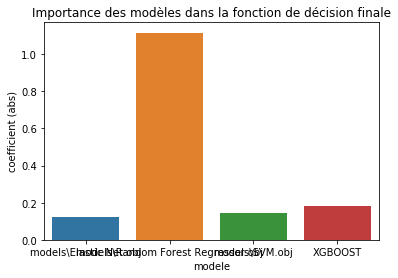

In [72]:
plt.title('Importance des modèles dans la fonction de décision finale')
sns.barplot(x = importance_modeles['modele'],
           y = importance_modeles['coefficient (abs)'])

#  Complément : Bootstrap

Reprendre le bootstrap pour avoir un élément de confiance dans la prédiction : on espère que plus l'erreur est grande plus la variance des prédictions obtenues par bootstrap est grande. Ce qui apporte beaucoup d'informations.

In [156]:
from sklearn.ensemble import RandomForestRegressor
scores = []
model_bootstrap = []
y_pred = []
yvar = []
for i in range(100):
    print('Echantillon ',i+1)
    #on choisit un échantillon bootstrap de l'ensemble du frame
    X_train_bootstrap, y_train_bootstrap = resample(X_train, y_train, 
                                                        replace=True, n_samples = X_train.shape[0])
    #instanciation du modèle
    model_bootstrap.append(RandomForestRegressor(n_jobs = -1, 
                                            max_features = 'sqrt', 
                                            min_samples_leaf = 1,
                                            n_estimators = 500))
    
    model_bootstrap[-1].fit(X_train_bootstrap, y_train_bootstrap)
    
    y_pred.append(model_bootstrap[-1].predict(X_test))
    scores.append(y_pred[i] - y_test.iloc[i])

y_pred = np.array(y_pred)
scores = np.array(scores)
var = []
score = []
for i in range(y_pred.shape[0]):
    var.append(np.var(y_pred[i,:]))
    score.append(np.mean(scores[i,:]))

Echantillon  1
Echantillon  2
Echantillon  3
Echantillon  4
Echantillon  5
Echantillon  6
Echantillon  7
Echantillon  8
Echantillon  9
Echantillon  10
Echantillon  11
Echantillon  12
Echantillon  13
Echantillon  14
Echantillon  15
Echantillon  16
Echantillon  17
Echantillon  18
Echantillon  19
Echantillon  20
Echantillon  21
Echantillon  22
Echantillon  23
Echantillon  24
Echantillon  25
Echantillon  26
Echantillon  27
Echantillon  28
Echantillon  29
Echantillon  30
Echantillon  31
Echantillon  32
Echantillon  33
Echantillon  34
Echantillon  35
Echantillon  36
Echantillon  37
Echantillon  38
Echantillon  39
Echantillon  40
Echantillon  41
Echantillon  42
Echantillon  43
Echantillon  44
Echantillon  45
Echantillon  46
Echantillon  47
Echantillon  48
Echantillon  49
Echantillon  50
Echantillon  51
Echantillon  52
Echantillon  53
Echantillon  54
Echantillon  55
Echantillon  56
Echantillon  57
Echantillon  58
Echantillon  59
Echantillon  60
Echantillon  61
Echantillon  62
Echantillon  63
E

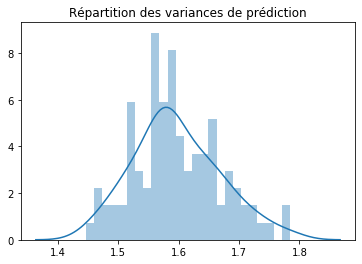

In [157]:
plt.title('Répartition des variances de prédiction')
sns.distplot(var, bins = 25)

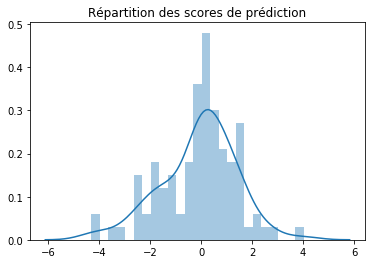

In [158]:
plt.title('Répartition des scores de prédiction')
sns.distplot(score, bins = 25)

In [167]:
for i, el in enumerate(score):
    score[i] = abs(el)

Text(0, 0.5, 'variance')

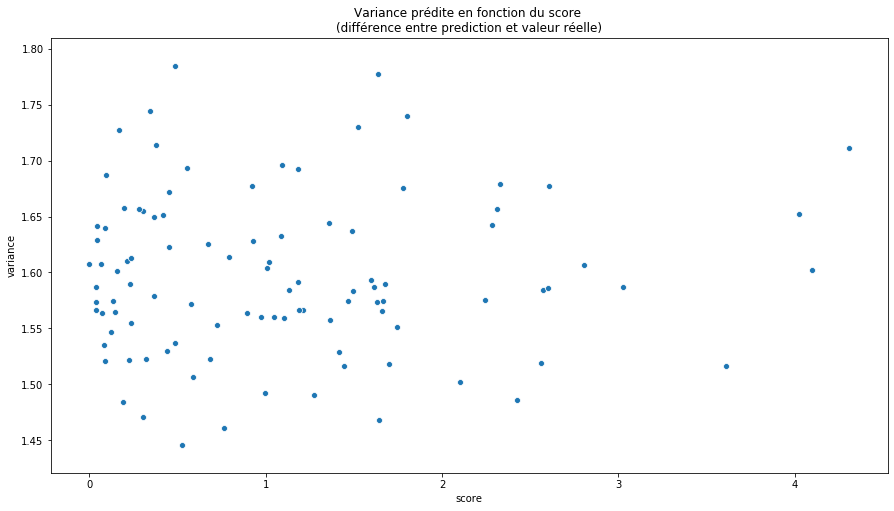

In [168]:
plt.figure(figsize=(15,8))
plt.title('Variance prédite en fonction du score \n(différence entre prediction et valeur réelle)')
sns.scatterplot(x = score, y = var)
plt.xlabel('score')
plt.ylabel('variance')

In [175]:
np.corrcoef(score , var)

array([[1.        , 0.04422661],
       [0.04422661, 1.        ]])